In [1]:
#import requests
#import bs4
#from bs4 import BeautifulSoup
from tqdm import tqdm

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", 3))

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

#from sklearn.pipeline import Pipeline
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor  

sns.set(font_scale=1.5)
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import scikitplot as skplt
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.color_palette("husl", 3))

import warnings
import scipy.stats as stats
from sklearn.tree import DecisionTreeRegressor
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

from ipywidgets import *
from IPython.display import display
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc("figure", figsize=(9, 7))
sns.set(font_scale=1.5)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

warnings.simplefilter('ignore')

from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier, AdaBoostRegressor, GradientBoostingClassifier, GradientBoostingRegressor

pd.set_option('display.max_columns', 500)   # to display 500 columns
pd.set_option('display.max_rows', 500) # to display 500 rows

import time
from datetime import datetime

In [2]:
import psycopg2

# DSN (data source name) format for database connections:  
# [protocol / database  name]://[username]:[password]@[hostname / ip]:[port]/[database name here]


# on your computer you are the user postgres (full administrative access)
db_user = 'postgres'
# if you need a password to access a database, put it here
db_password = ''
# on your computer, use localhost
db_host = 'localhost'
# the default port for postgres is 5432
db_port = 5432
# we want to connect to the northwind database
database =   'cms_claims' # 'cms_medicare_claims'  #

conn_str = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{database}'
conn = psycopg2.connect(conn_str)

In [3]:
# Check Tables in the Database
query = """
SELECT tablename 
FROM pg_catalog.pg_tables 
WHERE schemaname='public'
"""

pd.read_sql(query, con=conn)

tablename
0             icd9_diagonsis
1            icd9_procedures
2                      hcpcs
3            beneficiary2008
4            beneficiary2009
5            beneficiary2010
6           inpatient_claims
7          outpatient_claims
8   prescription_drug_events
9             final2008_2009
10          final2008_2009v1
11            ICD_Vectorized

In [ ]:
# final2008_2009 is already with replaced Nulls and flags


''' # Replacing  Nulls with 0

query = """

SELECT 

     "DESYNPUF_ID"
    , "BENE_BIRTH_DT"
    , COALESCE("BENE_DEATH_DT", '2100-01-01') as "BENE_DEATH_DT"
    , COALESCE("BENE_SEX_IDENT_CD", 0) as "BENE_SEX_IDENT_CD"
    , COALESCE("BENE_RACE_CD", 0) as "BENE_RACE_CD"
    , cast((CASE when "END_STAGE_RENAL2008" like 'Y' then '1' else '0' END) as int) as "END_STAGE_RENAL2008"
    , cast((CASE when "END_STAGE_RENAL2009" like 'Y' then '1' else '0' END) as int) as "END_STAGE_RENAL2009"
    , COALESCE("SP_ALZHDMTA2008", 0) as "SP_ALZHDMTA2008"
    , COALESCE("SP_ALZHDMTA2009", 0) as "SP_ALZHDMTA2009"
    , COALESCE("SP_CHF2008", 0) as "SP_CHF2008"
    , COALESCE("SP_CHF2009", 0) as "SP_CHF2009"
    , COALESCE("SP_CHRNKIDN2008", 0) as "SP_CHRNKIDN2008"
    , COALESCE("SP_CHRNKIDN2009", 0) as "SP_CHRNKIDN2009"
    , COALESCE("SP_CNCR2008", 0) as "SP_CNCR2008"
    , COALESCE("SP_CNCR2009", 0) as "SP_CNCR2009"
    , COALESCE("SP_COPD2008", 0) as "SP_COPD2008"
    , COALESCE("SP_COPD2009", 0) as "SP_COPD2009"
    , COALESCE("SP_DEPRESSN2008", 0) as "SP_DEPRESSN2008"
    , COALESCE("SP_DEPRESSN2009", 0) as "SP_DEPRESSN2009"
    , COALESCE("SP_DIABETES2008", 0) as "SP_DIABETES2008"
    , COALESCE("SP_DIABETES2009", 0) as "SP_DIABETES2009"
    , COALESCE("SP_ISCHMCHT2008", 0) as "SP_ISCHMCHT2008"
    , COALESCE("SP_ISCHMCHT2009", 0) as "SP_ISCHMCHT2009"
    , COALESCE("SP_OSTEOPRS2008", 0) as "SP_OSTEOPRS2008"
    , COALESCE("SP_OSTEOPRS2009", 0) as "SP_OSTEOPRS2009"
    , COALESCE("SP_RA_OA2008", 0) as "SP_RA_OA2008"
    , COALESCE("SP_RA_OA2009", 0) as "SP_RA_OA2009"
    , COALESCE("SP_STRKETIA2008", 0) as "SP_STRKETIA2008"
    , COALESCE("TOTAL_DIAGNOSIS2008", 0) as "TOTAL_DIAGNOSIS2008"
    , COALESCE("TOTAL_DIAGNOSIS2009", 0) as "TOTAL_DIAGNOSIS2009"
    , COALESCE("TOTAL_PAYMENT2008", 0) as "TOTAL_PAYMENT2008"
    , COALESCE("TOTAL_PAYMENT2009", 0) as "TOTAL_PAYMENT2009"
    , COALESCE("CHANGE_IN_PAYMEMT", 0) as "CHANGE_IN_PAYMEMT"
    , COALESCE("CHANGE_IN_DIANOSIS", 0) as "CHANGE_IN_DIAGNOSIS"
    , COALESCE("DEAD", 0) as "DEAD"
    , COALESCE("AGE", 0) as "AGE"
    , COALESCE("LOS", 0) as "LOS"
    , COALESCE("NUM_INPT_ADM", 0) as "NUM_INPT_ADM"
    , COALESCE("TOTAL_INPT_COST", 0) as "TOTAL_INPT_COST"
    , COALESCE("TOTAL_INPT_DIAGNOSIS", 0) as "TOTAL_INPT_DIAGNOSIS"
    , COALESCE("TOTAL_INPT_PROCS", 0) as "TOTAL_INPT_PROCS"
    , COALESCE("READMIT7", 0) as "READMIT7" 
    , COALESCE("READMIT30", 0) as "READMIT30"
    , COALESCE("READMIT60", 0) as "READMIT60"
    , COALESCE("READMIT90", 0) as "READMIT90"
    , COALESCE("NUM_OPD_VISIT", 0) as "NUM_OPD_VISIT"
    , COALESCE("TOTAL_OPD_COST", 0) as "TOTAL_OPD_COST"
    , COALESCE("TOTAL_OPD_DIAGNOSIS", 0) as "TOTAL_OPD_DIAGNOSIS"
    , COALESCE("TOTAL_OPD_PROCS", 0) as "TOTAL_OPD_PROCS"
    , COALESCE("TOTAL_OPD_HCPCS", 0) as "TOTAL_OPD_HCPCS"
    , COALESCE("TOTAL_QTY_DSPNSD_NUM", 0) as "TOTAL_QTY_DSPNSD_NUM"
    , COALESCE("PTNT_PAY_RX_AMT", 0) as "PTNT_PAY_RX_AMT"
    , COALESCE("TOT_RX_CST_AMT", 0) as "TOT_RX_CST_AMT"
    , COALESCE("INPT_DIAGS", '') as "INPT_DIAGS"
    , COALESCE("INPT_PROCS", '') as "INPT_PROCS"
    , COALESCE("OPD_DIAGS", '') as "OPD_DIAGS"
    , COALESCE("OPD_PROCS", '') as "OPD_PROCS"
    , COALESCE("OPD_HCPCS", '') as "OPD_HCPCS"
    , CASE when "READMIT7" = 0.0 then 0 else 1 END as "READMIT7_FLAG"  
    , CASE when "READMIT30" = 0.0 then 0 else 1 END as "READMIT30_FLAG" 
    , CASE when "READMIT60" = 0.0 then 0 else 1 END as "READMIT60_FLAG" 
    , CASE when "READMIT90" = 0.0 then 0 else 1 END as "READMIT90_FLAG" 

FROM final2008_2009
"""

df = pd.read_sql(query, conn) 
# df is patients who are in 2008 and 2009 benefciiary, unfortunately 2010 doesnt have common benefciary patients

print(df.shape)
df.head(2)

'''

In [4]:
query = """

SELECT * 
FROM final2008_2009
"""

df = pd.read_sql(query, conn) 

print(df.shape)
df.head(2)

(458328, 62)


DESYNPUF_ID BENE_BIRTH_DT BENE_DEATH_DT  BENE_SEX_IDENT_CD  \
0  00000B48BCF4AD29    1923-09-01    2100-01-01                  2   
1  0000141F2FECE9BC    1974-04-01    2100-01-01                  2   

   BENE_RACE_CD  END_STAGE_RENAL2008  END_STAGE_RENAL2009  SP_ALZHDMTA2008  \
0             5                    0                    0                1   
1             1                    0                    0                2   

   SP_ALZHDMTA2009  SP_CHF2008  SP_CHF2009  SP_CHRNKIDN2008  SP_CHRNKIDN2009  \
0                1           1           1                1                2   
1                2           2           2                2                2   

   SP_CNCR2008  SP_CNCR2009  SP_COPD2008  SP_COPD2009  SP_DEPRESSN2008  \
0            1            2            2            2                1   
1            2            2            2            2                2   

   SP_DEPRESSN2009  SP_DIABETES2008  SP_DIABETES2009  SP_ISCHMCHT2008  \
0                1                1                1                1   
1                1                2                2                2   

   SP_ISCHMCHT2009  SP_OSTEOPRS2008  SP_OSTEOPRS2009  SP_RA_OA2008  \
0                1                1                1             2   
1                2                2                2             2   

   SP_RA_OA2009  SP_STRKETIA2008  TOTAL_DIAGNOSIS2008  TOTAL_DIAGNOSIS2009  \
0             2                1                    9                    6   
1             2                2                    0                    1   

   TOTAL_PAYMENT2008  TOTAL_PAYMENT2009  CHANGE_IN_PAYMEMT  \
0            93452.0             8750.0           -84702.0   
1                0.0             5308.0             5308.0   

   CHANGE_IN_DIAGNOSIS  DEAD   AGE               LOS  NUM_INPT_ADM  \
0                   -3     0  86.0  2419200000000000           3.0   
1                    1     0  35.0   172800000000000           1.0   

   TOTAL_INPT_COST  TOTAL_INPT_DIAGNOSIS  TOTAL_INPT_PROCS  READMIT7  \
0          84072.0                  27.0              11.0       2.0   
1           5108.0                   9.0               1.0       0.0   

   READMIT30  READMIT60  READMIT90  NUM_OPD_VISIT  TOTAL_OPD_COST  \
0        2.0        2.0        2.0           10.0          3210.0   
1        0.0        0.0        0.0           30.0          7870.0   

   TOTAL_OPD_DIAGNOSIS  TOTAL_OPD_PROCS  TOTAL_OPD_HCPCS  \
0                 27.0              0.0             47.0   
1                 99.0              0.0             67.0   

   TOTAL_QTY_DSPNSD_NUM  PTNT_PAY_RX_AMT  TOT_RX_CST_AMT  \
0                 210.0             10.0           200.0   
1                9930.0           1740.0         13490.0   

                                          INPT_DIAGS  \
0   4241 2760 7802 2763 42821 2762 41410 3970 511...   
1      5789 79029 5363 5990 3569 2449 2851 311 2869    

                                          INPT_PROCS  \
0   3521 9971 5601 V451 V451 41071 3615 53081 428...   
1                                          4516        

                                           OPD_DIAGS  \
0   72999 72981         2721 V1250 2330        79...   
1   32731 78079 5990 53081       OTHER          2...   

                                           OPD_PROCS  \
0                                                ...   
1                                                ...   

                                           OPD_HCPCS  READMIT7_FLAG  \
0   93971             G0103 80076 80053 80053 856...              1   
1   92557 A0436                         80053 A95...              0   

   READMIT30_FLAG  READMIT60_FLAG  READMIT90_FLAG  
0               1               1               1  
1               0               0               0

In [5]:
#df.READMIT90_FLAG.unique()

In [6]:
# Checking for nulls

df.isnull().sum()

DESYNPUF_ID             0
BENE_BIRTH_DT           0
BENE_DEATH_DT           0
BENE_SEX_IDENT_CD       0
BENE_RACE_CD            0
END_STAGE_RENAL2008     0
END_STAGE_RENAL2009     0
SP_ALZHDMTA2008         0
SP_ALZHDMTA2009         0
SP_CHF2008              0
SP_CHF2009              0
SP_CHRNKIDN2008         0
SP_CHRNKIDN2009         0
SP_CNCR2008             0
SP_CNCR2009             0
SP_COPD2008             0
SP_COPD2009             0
SP_DEPRESSN2008         0
SP_DEPRESSN2009         0
SP_DIABETES2008         0
SP_DIABETES2009         0
SP_ISCHMCHT2008         0
SP_ISCHMCHT2009         0
SP_OSTEOPRS2008         0
SP_OSTEOPRS2009         0
SP_RA_OA2008            0
SP_RA_OA2009            0
SP_STRKETIA2008         0
TOTAL_DIAGNOSIS2008     0
TOTAL_DIAGNOSIS2009     0
TOTAL_PAYMENT2008       0
TOTAL_PAYMENT2009       0
CHANGE_IN_PAYMEMT       0
CHANGE_IN_DIAGNOSIS     0
DEAD                    0
AGE                     0
LOS                     0
NUM_INPT_ADM            0
TOTAL_INPT_C

In [7]:
#Checking data types

df.dtypes

DESYNPUF_ID                     object
BENE_BIRTH_DT           datetime64[ns]
BENE_DEATH_DT           datetime64[ns]
BENE_SEX_IDENT_CD                int64
BENE_RACE_CD                     int64
END_STAGE_RENAL2008              int64
END_STAGE_RENAL2009              int64
SP_ALZHDMTA2008                  int64
SP_ALZHDMTA2009                  int64
SP_CHF2008                       int64
SP_CHF2009                       int64
SP_CHRNKIDN2008                  int64
SP_CHRNKIDN2009                  int64
SP_CNCR2008                      int64
SP_CNCR2009                      int64
SP_COPD2008                      int64
SP_COPD2009                      int64
SP_DEPRESSN2008                  int64
SP_DEPRESSN2009                  int64
SP_DIABETES2008                  int64
SP_DIABETES2009                  int64
SP_ISCHMCHT2008                  int64
SP_ISCHMCHT2009                  int64
SP_OSTEOPRS2008                  int64
SP_OSTEOPRS2009                  int64
SP_RA_OA2008             

In [9]:
df.columns

Index(['DESYNPUF_ID', 'BENE_BIRTH_DT', 'BENE_DEATH_DT', 'BENE_SEX_IDENT_CD',
       'BENE_RACE_CD', 'END_STAGE_RENAL2008', 'END_STAGE_RENAL2009',
       'SP_ALZHDMTA2008', 'SP_ALZHDMTA2009', 'SP_CHF2008', 'SP_CHF2009',
       'SP_CHRNKIDN2008', 'SP_CHRNKIDN2009', 'SP_CNCR2008', 'SP_CNCR2009',
       'SP_COPD2008', 'SP_COPD2009', 'SP_DEPRESSN2008', 'SP_DEPRESSN2009',
       'SP_DIABETES2008', 'SP_DIABETES2009', 'SP_ISCHMCHT2008',
       'SP_ISCHMCHT2009', 'SP_OSTEOPRS2008', 'SP_OSTEOPRS2009', 'SP_RA_OA2008',
       'SP_RA_OA2009', 'SP_STRKETIA2008', 'TOTAL_DIAGNOSIS2008',
       'TOTAL_DIAGNOSIS2009', 'TOTAL_PAYMENT2008', 'TOTAL_PAYMENT2009',
       'CHANGE_IN_PAYMEMT', 'CHANGE_IN_DIAGNOSIS', 'DEAD', 'AGE', 'LOS',
       'NUM_INPT_ADM', 'TOTAL_INPT_COST', 'TOTAL_INPT_DIAGNOSIS',
       'TOTAL_INPT_PROCS', 'READMIT7', 'READMIT30', 'READMIT60', 'READMIT90',
       'NUM_OPD_VISIT', 'TOTAL_OPD_COST', 'TOTAL_OPD_DIAGNOSIS',
       'TOTAL_OPD_PROCS', 'TOTAL_OPD_HCPCS', 'TOTAL_QTY_DSPNSD_NUM',

In [8]:
# Some columns still have None, replacing with space

df.INPT_DIAGS.fillna('', inplace=True)
#df.INPT_DIAGS.values

df.INPT_PROCS.fillna('', inplace=True)
df.OPD_DIAGS.fillna('', inplace=True)
df.OPD_PROCS.fillna('', inplace=True)

In [9]:
# Combining all the diagnosis and procedure codes from inpatient and outpatient visits (as some codes may be 
#repated and we want total counts, not duplicate features)

df_ICD_codes = df.INPT_DIAGS + df.INPT_PROCS + df.OPD_DIAGS + df.OPD_PROCS
df_ICD_codes.shape

(458328,)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(token_pattern='\w+')

cvec.fit(df_ICD_codes.values)
df_ICD_codes_vectorized = pd.DataFrame(cvec.transform(df_ICD_codes.values).toarray(),columns=cvec.get_feature_names())

#df_ICD_codes_vectorized['DESYNPUF_ID'] = df['DESYNPUF_ID']

print(df_ICD_codes_vectorized.shape)
df_ICD_codes_vectorized.head(2)

(458328, 45860)


0  0010  0011  0019  0020  0021  0022  0023  0029  0030  0031  00320  \
0  0     0     0     0     0     0     0     0     0     0     0      0   
1  0     0     0     0     0     0     0     0     0     0     0      0   

   00321  00322  00323  00324  00329  0038  0039  0040  0041  0042  0043  \
0      0      0      0      0      0     0     0     0     0     0     0   
1      0      0      0      0      0     0     0     0     0     0     0   

   0048  0049  0050  0051  0052  0053  0054  00551  0058  00581  00589  0059  \
0     0     0     0     0     0     0     0      0     0      0      0     0   
1     0     0     0     0     0     0     0      0     0      0      0     0   

   0060  0061  0062  0063  0064  0065  0066  0068  0069  0070  0071  0072  \
0     0     0     0     0     0     0     0     0     0     0     0     0   
1     0     0     0     0     0     0     0     0     0     0     0     0   

   0073  0074  0075  0078  0079  0080  00800  00801  00802  00803  00804  \
0     0     0     0     0     0     0      0      0      0      0      0   
1     0     0     0     0     0     0      0      0      0      0      0   

   00809  0081  0082  0083  00841  00842  00843  00844  00845  008450389  \
0      0     0     0     0      0      0      0      0      0          0   
1      0     0     0     0      0      0      0      0      0          0   

   008451112  00845124  008451625  008451742  008451759  0084525001  \
0          0         0          0          0          0           0   
1          0         0          0          0          0           0   

   0084525080  008452724  0084529574  008453249  00845331  008453812  \
0           0          0           0          0         0          0   
1           0          0           0          0         0          0   

   008453893  008453950  008454011  008454131  0084541401  0084543491  \
0          0          0          0          0           0           0   
1          0          0          0          0           0           0   

   008454561  008454562  008454576  008455181  008455411  008455650  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   

   008455849  008455891  008455990  008456021  008456262  0084572210  \
0          0          0          0          0          0           0   
1          0          0          0          0          0           0   

   0084572888  008457310  0084573313  0084573329  0084578659  008457867  \
0           0          0           0           0           0          0   
1           0          0           0           0           0          0   

   0084578934  0084579678  0084582111  008458339  008458607  008458798  \
0           0           0           0          0          0          0   
1           0           0           0          0          0          0   

   008458872  008459604  008459671  008459921  008459925  008459960  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   

   00845v568  00845v580  00845v5812  00846  00847  00849  008499904  0085  \
0          0          0           0      0      0      0          0     0   
1          0          0           0      0      0      0          0     0   

   0086  00861  00862  00863  00864  00865  00866  00867  00869  0088  \
0     0      0      0      0      0      0      0      0      0     0   
1     0      0      0      0      0      0      0      0      0     0   

   0088151  0090  009051881  0091  0092  0093  01001  01003  01005  01006  \
0        0     0          0     0     0     0      0      0      0      0   
1        0     0          0     0     0     0      0      0      0      0   

   01010  01012  01015  01016  01092  01093  01102  01105  01110  01113  \
0      0      0      0      0      0      0      0      0      0      0   
1      0      0      0      0      0  

In [14]:
''' cvec = CountVectorizer(token_pattern='\w+')

cvec.fit(df.INPT_DIAGS.values)
df_INPT_DIAGS = pd.DataFrame(cvec.transform(df.INPT_DIAGS.values).toarray(),columns=cvec.get_feature_names())
df_INPT_DIAGS.shape '''


''' cvec = CountVectorizer(token_pattern='\w+')

cvec.fit(df.INPT_PROCS.values)
df_INPT_PROCS = pd.DataFrame(cvec.transform(df.INPT_PROCS.values).toarray(),columns=cvec.get_feature_names())
df_INPT_PROCS.shape '''

" cvec = CountVectorizer(token_pattern='\\w+')\n\ncvec.fit(df.INPT_PROCS.values)\ndf_INPT_PROCS = pd.DataFrame(cvec.transform(df.INPT_PROCS.values).toarray(),columns=cvec.get_feature_names())\ndf_INPT_PROCS.shape "

In [15]:
'''cvec = CountVectorizer(token_pattern='\w+')

cvec.fit(df.OPD_DIAGS.values)
df_INPT_PROCS = pd.DataFrame(cvec.transform(df.OPD_DIAGS.values).toarray(),columns=cvec.get_feature_names())
df_INPT_PROCS.shape'''

"cvec = CountVectorizer(token_pattern='\\w+')\n\ncvec.fit(df.OPD_DIAGS.values)\ndf_INPT_PROCS = pd.DataFrame(cvec.transform(df.OPD_DIAGS.values).toarray(),columns=cvec.get_feature_names())\ndf_INPT_PROCS.shape"

#### Visualizing the spread of information 

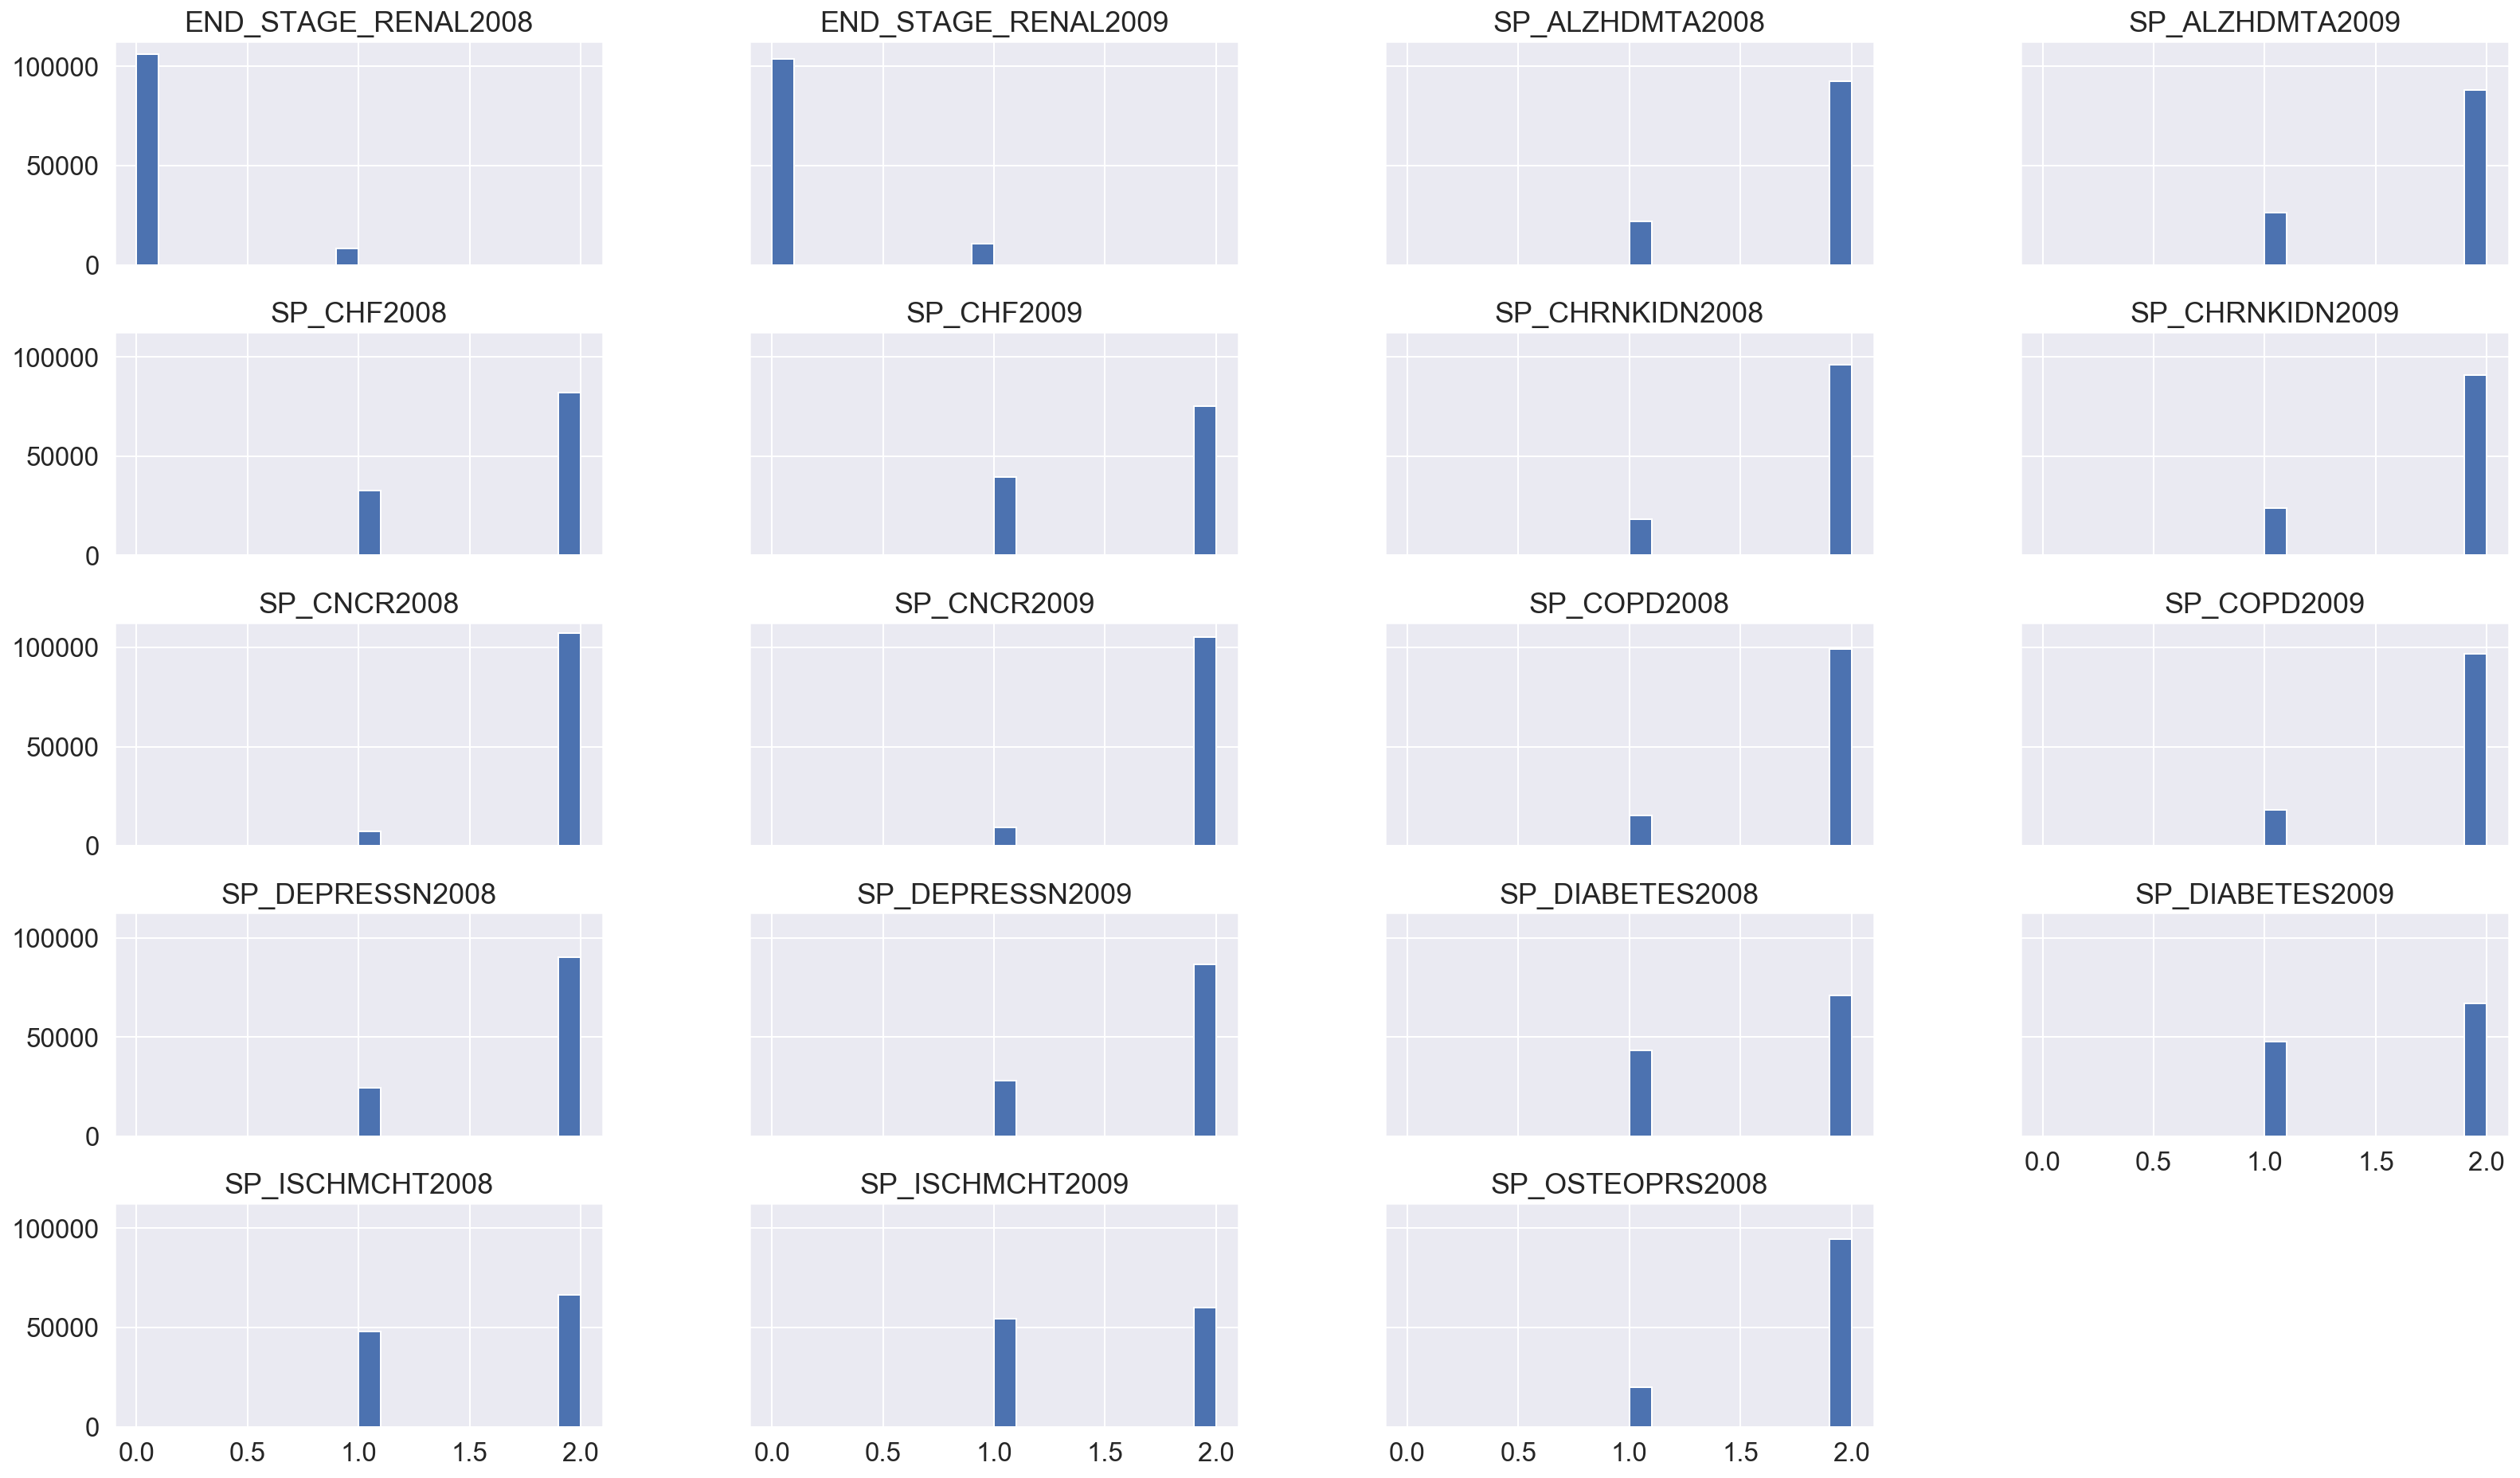

In [34]:
# Plot value_counts ??

df.iloc[:,5:24].hist(figsize=(24,16), sharex=True, sharey=True)
plt.show()  # 1 means have diesease, 2 means no disease

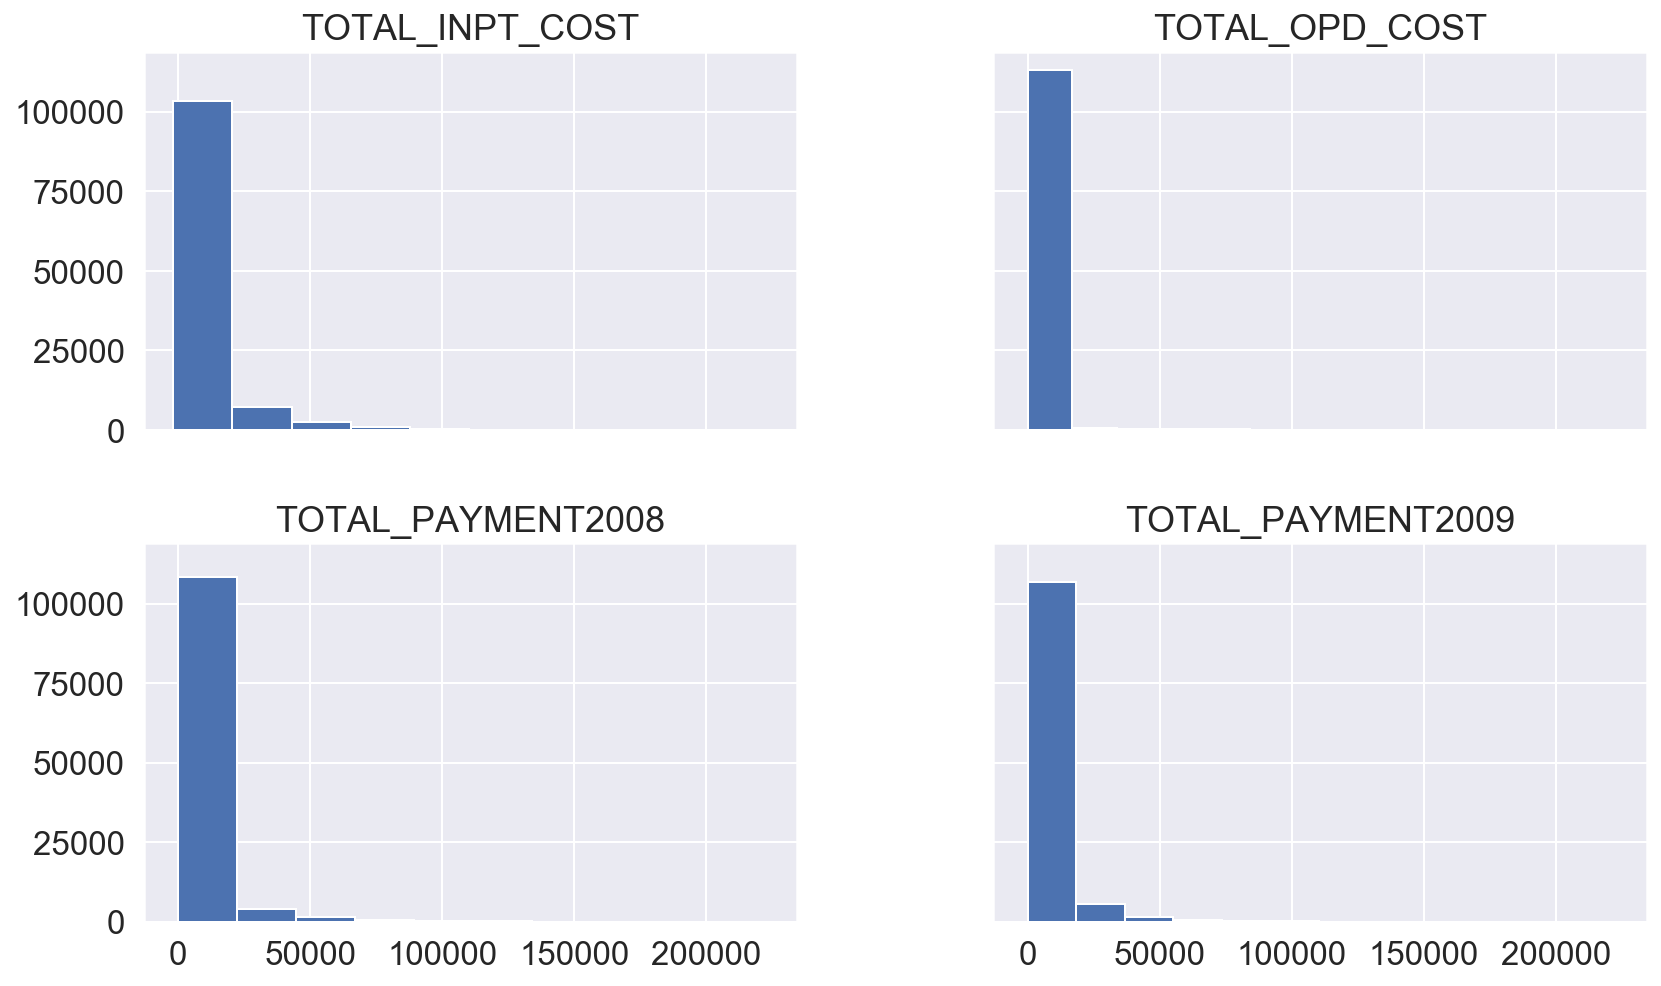

In [35]:
df[['TOTAL_INPT_COST', 'TOTAL_OPD_COST',
                                    'TOTAL_PAYMENT2008',
                                    'TOTAL_PAYMENT2009']].hist(figsize=(12,8), sharex=True, sharey=True)
plt.show()  

In [30]:
#final2008_2009DF_selectedFeatures.iloc[:,20:29].hist(figsize=(12,20), sharex=True, sharey=True)
#plt.show()

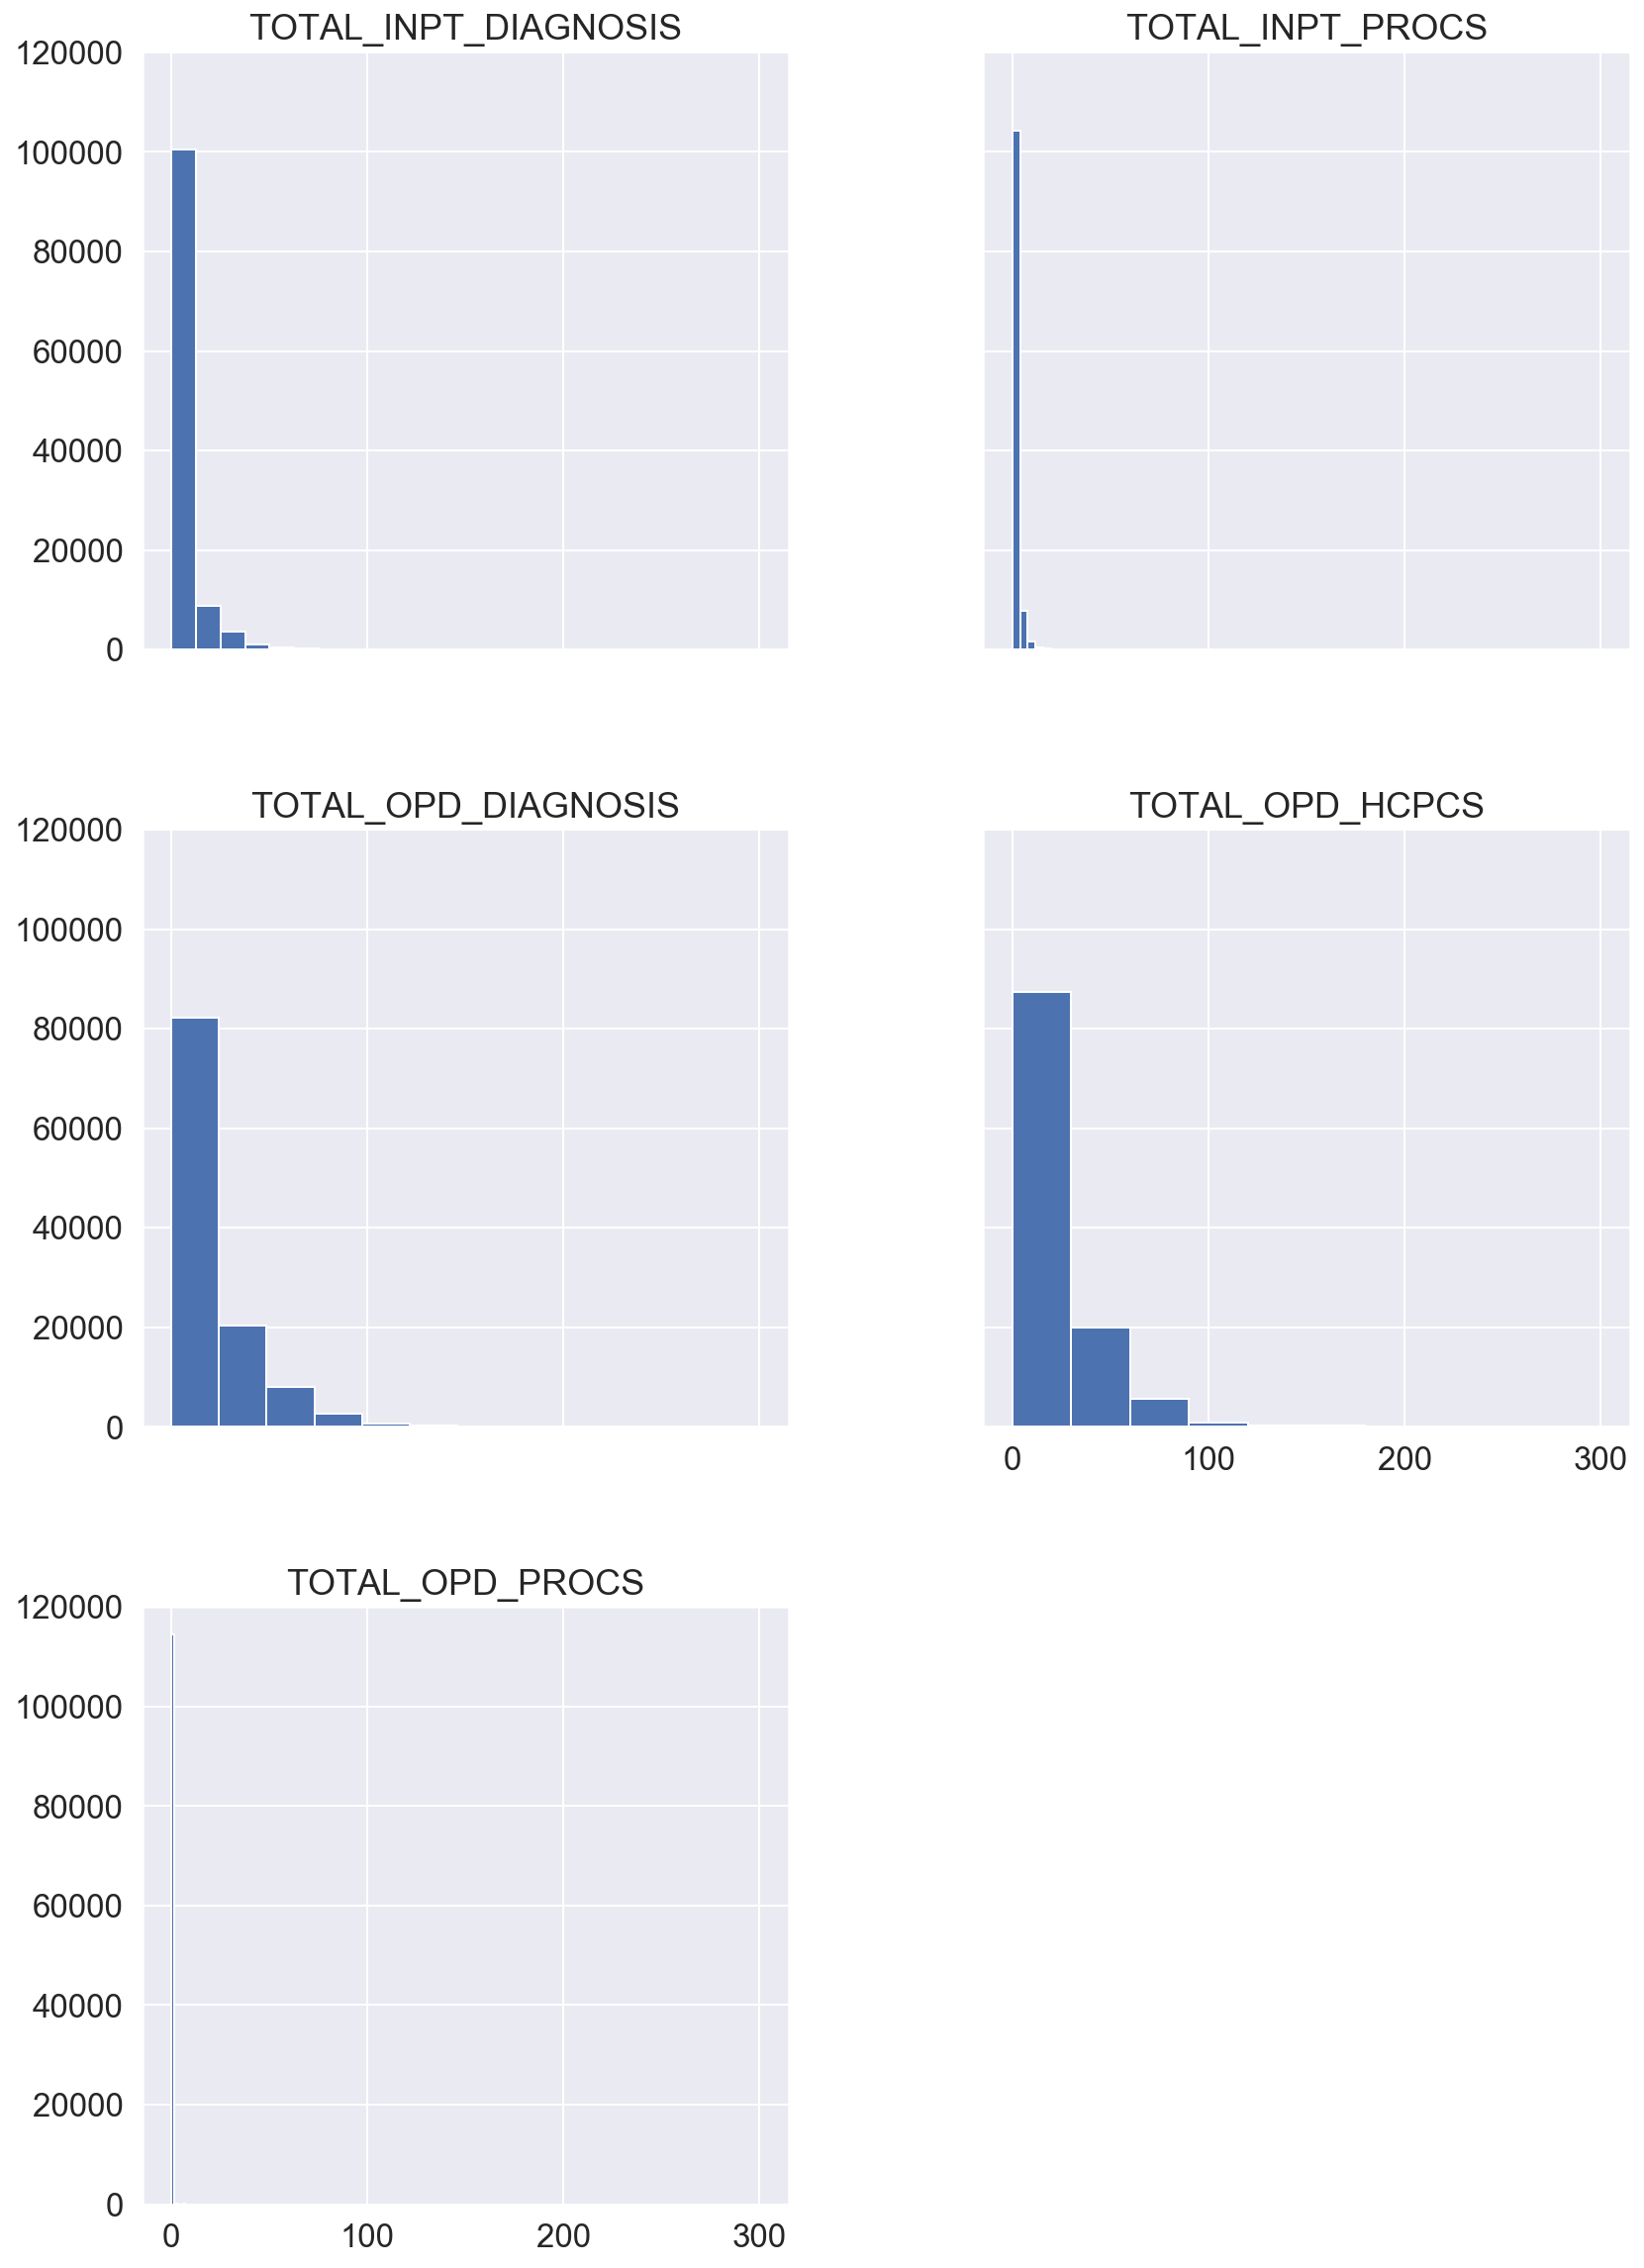

In [36]:
df[['TOTAL_INPT_DIAGNOSIS','TOTAL_INPT_PROCS', 
                                   'TOTAL_OPD_DIAGNOSIS','TOTAL_OPD_PROCS',
                                   'TOTAL_OPD_HCPCS',]].hist(figsize=(12,20), sharex=True, sharey=True) #bins=10
plt.show()  #  'NUM_OPD_VISIT'

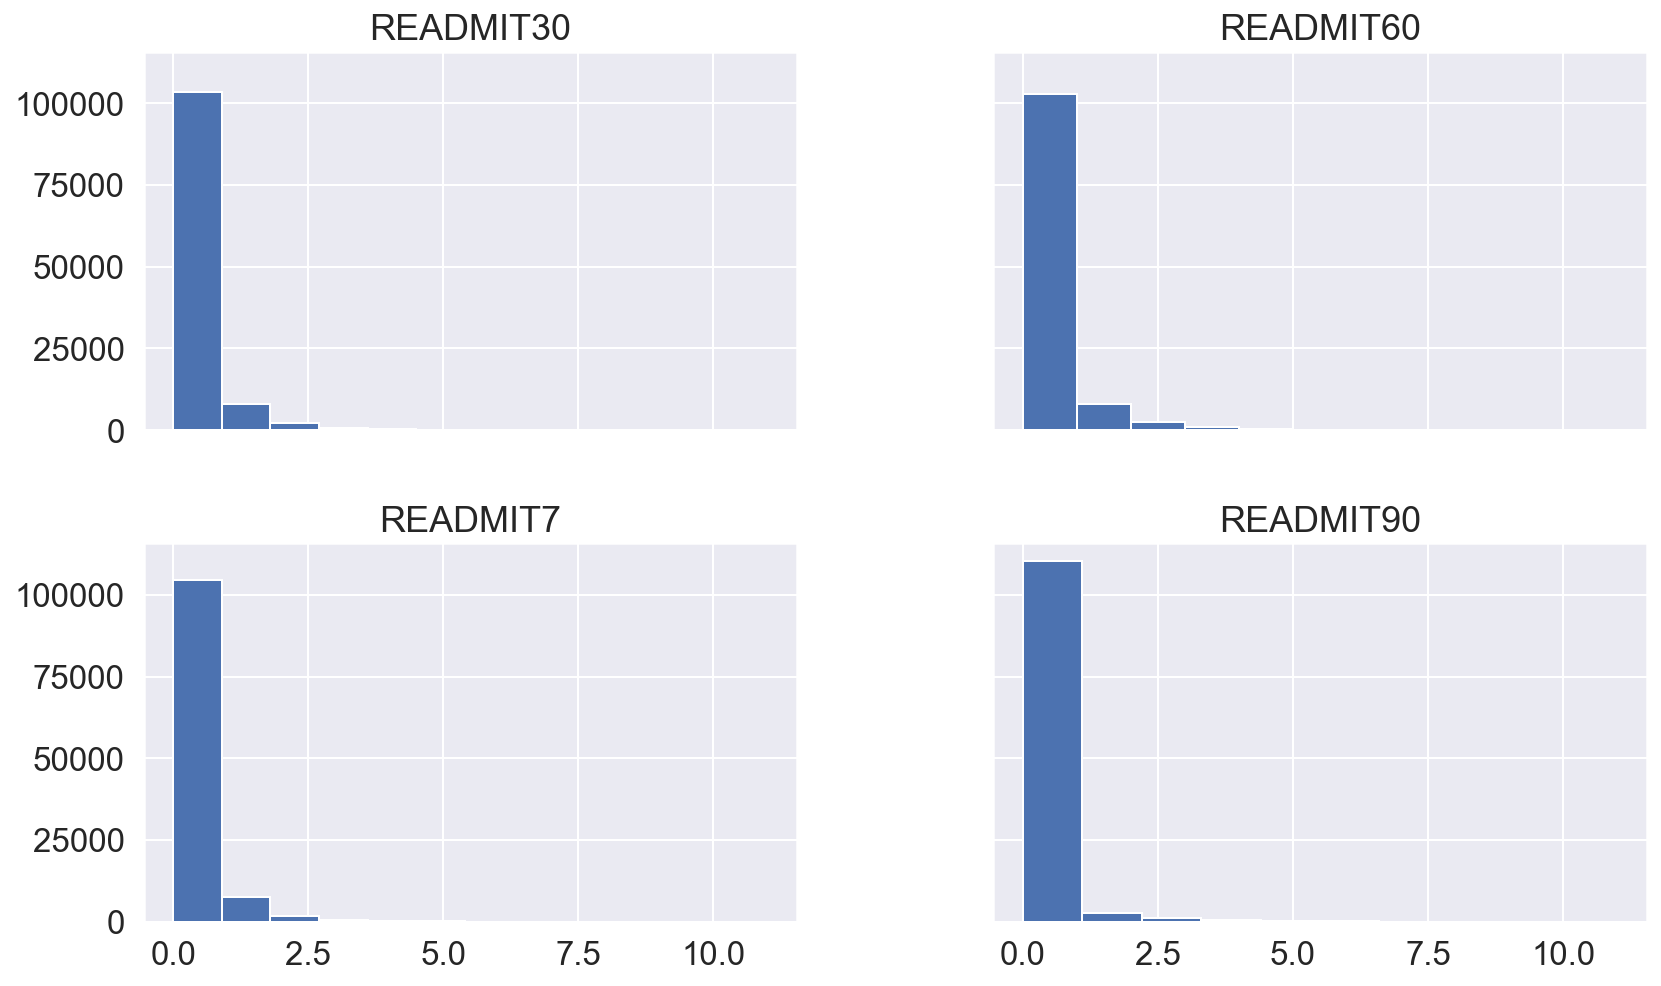

In [37]:
df[['READMIT7','READMIT30','READMIT60','READMIT90']].hist(figsize=(12,8), sharex=True, sharey=True)
plt.show()

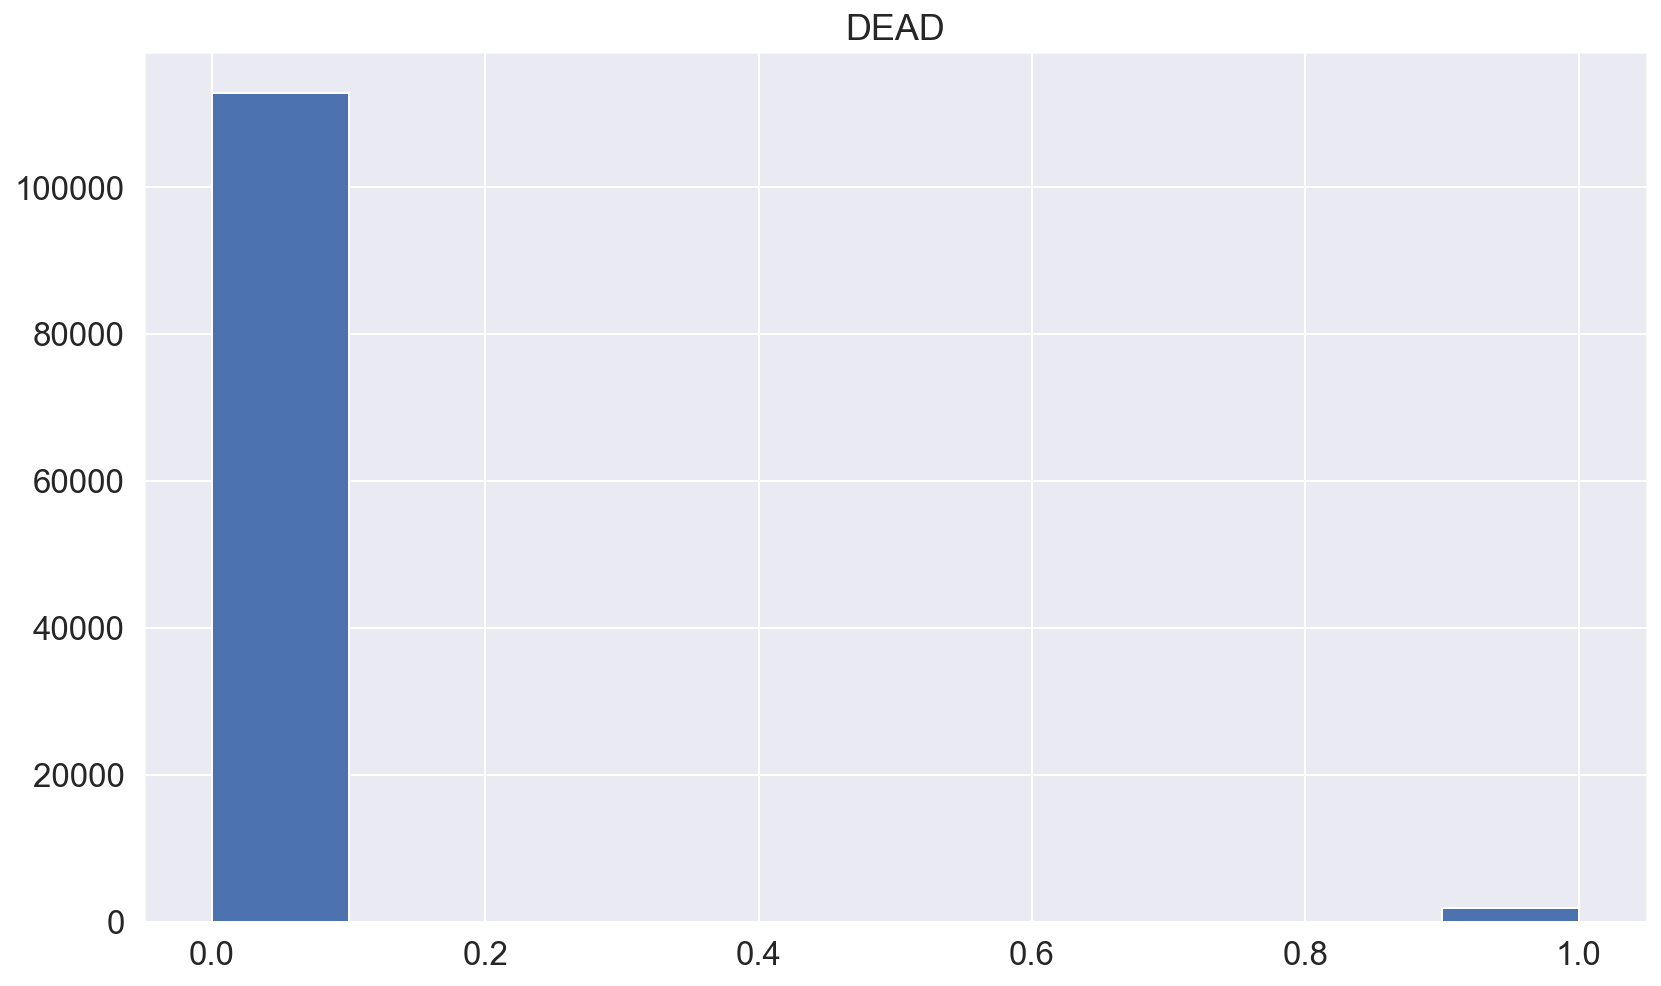

In [38]:
df[['DEAD']].hist(figsize=(12,8), sharex=True, sharey=True)
plt.show()

### Looking for corelation between the variables

In [9]:
corr = df.corr()
corr

BENE_SEX_IDENT_CD  BENE_RACE_CD  END_STAGE_RENAL2008  \
BENE_SEX_IDENT_CD              1.000000     -0.002014             0.010620   
BENE_RACE_CD                  -0.002014      1.000000            -0.010043   
END_STAGE_RENAL2008            0.010620     -0.010043             1.000000   
END_STAGE_RENAL2009            0.012348     -0.012050             0.223199   
SP_ALZHDMTA2008               -0.028000      0.018841            -0.181248   
SP_ALZHDMTA2009               -0.029205      0.021716            -0.157829   
SP_CHF2008                    -0.029833      0.028560            -0.248140   
SP_CHF2009                    -0.030813      0.033484            -0.213401   
SP_CHRNKIDN2008               -0.019849      0.021986            -0.444004   
SP_CHRNKIDN2009               -0.022963      0.020971            -0.255058   
SP_CNCR2008                   -0.003268      0.022071            -0.097296   
SP_CNCR2009                   -0.001630      0.025387            -0.074324   
SP_COPD2008                   -0.019019      0.017502            -0.213796   
SP_COPD2009                   -0.022936      0.019224            -0.179359   
SP_DEPRESSN2008               -0.034689      0.013334            -0.165446   
SP_DEPRESSN2009               -0.034278      0.018506            -0.146703   
SP_DIABETES2008               -0.041289      0.034334            -0.239939   
SP_DIABETES2009               -0.039473      0.036305            -0.213996   
SP_ISCHMCHT2008               -0.034930      0.043116            -0.223525   
SP_ISCHMCHT2009               -0.032901      0.044464            -0.193890   
SP_OSTEOPRS2008               -0.031519      0.023292            -0.114852   
SP_OSTEOPRS2009               -0.029518      0.026563            -0.092001   
SP_RA_OA2008                  -0.027536      0.025768            -0.139138   
SP_RA_OA2009                  -0.024659      0.026291            -0.117129   
SP_STRKETIA2008               -0.008198      0.009768            -0.153895   
TOTAL_DIAGNOSIS2008            0.046593     -0.042165             0.352498   
TOTAL_DIAGNOSIS2009            0.046907     -0.047135             0.289345   
TOTAL_PAYMENT2008              0.012576     -0.022515             0.344924   
TOTAL_PAYMENT2009              0.019875     -0.023577             0.259135   
CHANGE_IN_PAYMEMT              0.004363      0.002065            -0.115592   
CHANGE_IN_DIAGNOSIS            0.002254     -0.008939            -0.079428   
DEAD                          -0.001399     -0.001170             0.001674   
AGE                            0.108223     -0.076374             0.027200   
LOS                           -0.001133     -0.000440            -0.001738   
NUM_INPT_ADM                   0.000725     -0.000242            -0.000299   
TOTAL_INPT_COST                0.000028      0.000385             0.001185   
TOTAL_INPT_DIAGNOSIS           0.000635     -0.000435            -0.000333   
TOTAL_INPT_PROCS               0.000725     -0.001103             0.000067   
READMIT7                       0.000334     -0.000129             0.000473   
READMIT30                      0.000929      0.000252             0.000675   
READMIT60                      0.001020     -0.000014             0.001184   
READMIT90                      0.001244     -0.000274             0.001143   
NUM_OPD_VISIT                 -0.001004     -0.001168             0.000940   
TOTAL_OPD_COST                -0.001002      0.000448             0.001515   
TOTAL_OPD_DIAGNOSIS           -0.001108     -0.000716             0.001129   
TOTAL_OPD_PROCS                0.001997      0.001562            -0.002804   
TOTAL_OPD_HCPCS               -0.000744     -0.000585             0.000962   
TOTAL_QTY_DSPNSD_NUM          -0.001632     -0.002232            -0.000249   
PTNT_PAY_RX_AMT               -0.001358     -0.002353            -0.000565   
TOT_RX_CST_AMT                -0.002229     -0.002124            -0.000759   
READMIT7_FLAG                  0.000830     

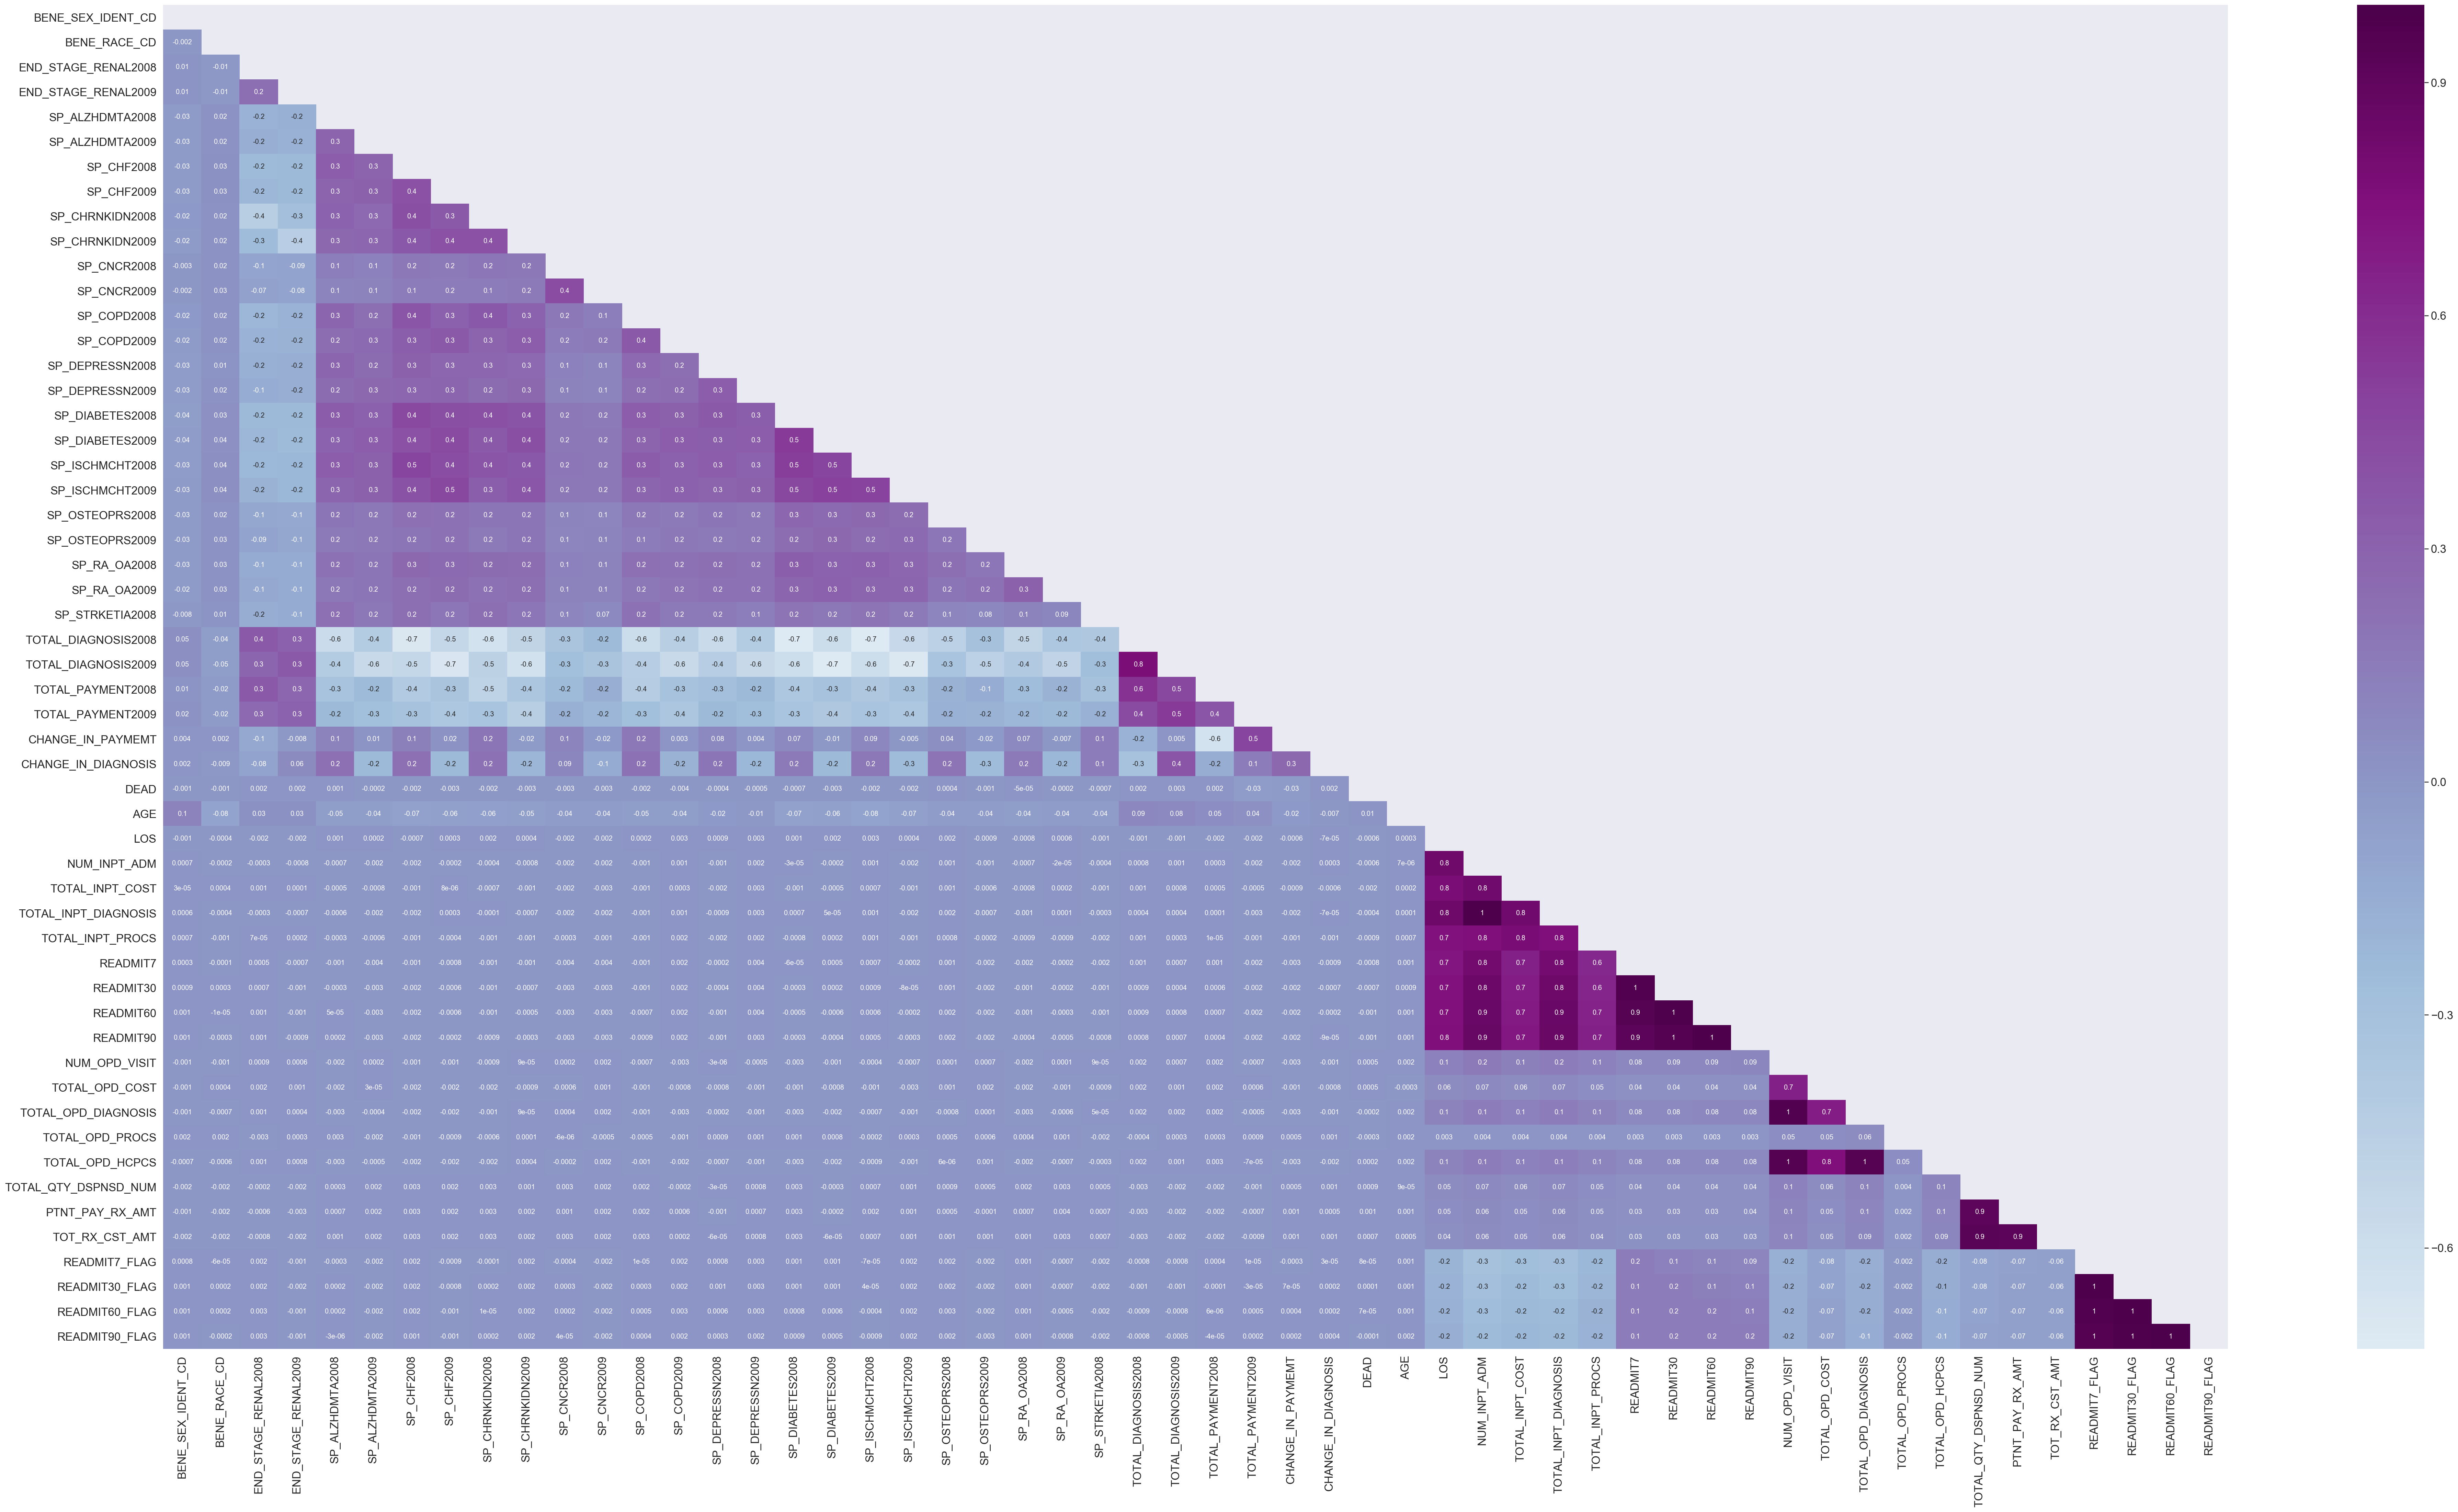

In [10]:
fig, ax = plt.subplots(figsize=(60,36))
matrix = np.triu(corr)
ax = sns.heatmap(corr, annot = True, mask=matrix, center= 0, cmap="BuPu" ,fmt='.1g'); #cmap= 'coolwarm',    

#### Correlation of predcitor variable against the target variables

In [12]:
corr1 = df.corr()['READMIT30_FLAG'][:] # 'READMIT7', 'READMIT30', 'READMIT60', 'READMIT90'
corr_target = corr1.sort_values(ascending=False)
corr_target

READMIT30_FLAG          1.000000
READMIT60_FLAG          0.985010
READMIT7_FLAG           0.981592
READMIT90_FLAG          0.974021
READMIT30               0.154081
READMIT7                0.149538
READMIT60               0.134177
READMIT90               0.120721
SP_DEPRESSN2009         0.003028
SP_OSTEOPRS2008         0.002317
SP_COPD2009             0.002282
SP_ISCHMCHT2009         0.002138
END_STAGE_RENAL2008     0.001944
SP_CHRNKIDN2009         0.001932
SP_CHF2008              0.001542
BENE_SEX_IDENT_CD       0.001327
SP_RA_OA2008            0.001313
AGE                     0.001303
SP_DIABETES2008         0.001118
SP_DIABETES2009         0.001118
SP_DEPRESSN2008         0.001037
SP_COPD2008             0.000337
SP_CNCR2008             0.000252
SP_CHRNKIDN2008         0.000242
SP_ALZHDMTA2008         0.000195
CHANGE_IN_DIAGNOSIS     0.000186
BENE_RACE_CD            0.000165
DEAD                    0.000146
CHANGE_IN_PAYMEMT       0.000074
SP_ISCHMCHT2008         0.000044
TOTAL_PAYM

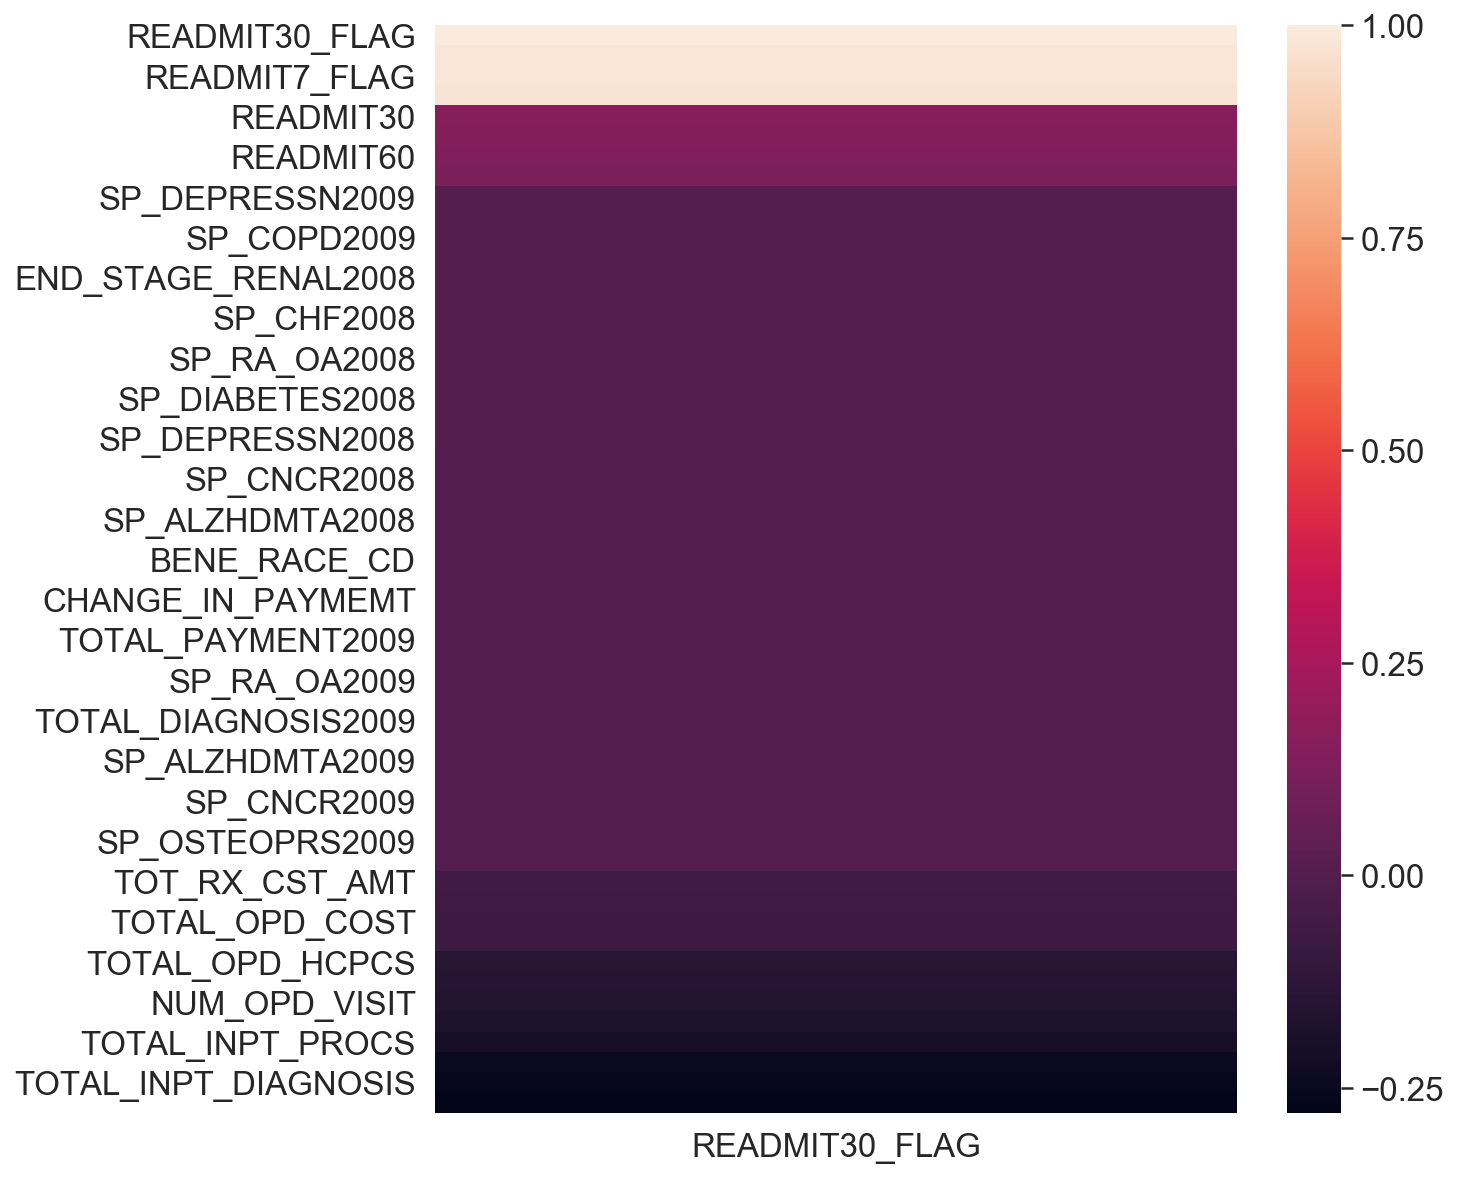

In [13]:
corr_target_df=pd.DataFrame(corr_target)
fig, ax = plt.subplots(figsize=(8,10 ))
sns.heatmap(corr_target_df);

### Feature selection (excuding string summation of ICDs and features which are showing colinearity etc.)

In [11]:
df_selected = df[['BENE_SEX_IDENT_CD',
       'BENE_RACE_CD', 'END_STAGE_RENAL2008', 'END_STAGE_RENAL2009',
       'SP_ALZHDMTA2008', 'SP_ALZHDMTA2009', 'SP_CHF2008', 'SP_CHF2009',
       'SP_CHRNKIDN2008', 'SP_CHRNKIDN2009', 'SP_CNCR2008', 'SP_CNCR2009',
       'SP_COPD2008', 'SP_COPD2009', 'SP_DEPRESSN2008', 'SP_DEPRESSN2009',
       'SP_DIABETES2008', 'SP_DIABETES2009', 'SP_ISCHMCHT2008',
       'SP_ISCHMCHT2009', 'SP_OSTEOPRS2008', 'SP_OSTEOPRS2009', 'SP_RA_OA2008',
       'SP_RA_OA2009', 'SP_STRKETIA2008', 'TOTAL_DIAGNOSIS2008',
       'TOTAL_DIAGNOSIS2009', 'TOTAL_PAYMENT2008', 'TOTAL_PAYMENT2009',
       'CHANGE_IN_PAYMEMT', 'CHANGE_IN_DIAGNOSIS', 'AGE', 'LOS',
       'NUM_INPT_ADM', 'TOTAL_INPT_COST', 'TOTAL_INPT_DIAGNOSIS',
       'TOTAL_INPT_PROCS', 
       'NUM_OPD_VISIT', 'TOTAL_OPD_COST', 'TOTAL_OPD_DIAGNOSIS',
       'TOTAL_OPD_PROCS', 'TOTAL_OPD_HCPCS', 'TOTAL_QTY_DSPNSD_NUM',
       'PTNT_PAY_RX_AMT', 'TOT_RX_CST_AMT', 'READMIT30_FLAG']].copy()   # , 'DEAD'
print(df_selected.shape)
df_selected.head(2)  
# 'READMIT7', 'READMIT30', 'READMIT60', 'READMIT90',

(458328, 46)


BENE_SEX_IDENT_CD  BENE_RACE_CD  END_STAGE_RENAL2008  END_STAGE_RENAL2009  \
0                  2             5                    0                    0   
1                  2             1                    0                    0   

   SP_ALZHDMTA2008  SP_ALZHDMTA2009  SP_CHF2008  SP_CHF2009  SP_CHRNKIDN2008  \
0                1                1           1           1                1   
1                2                2           2           2                2   

   SP_CHRNKIDN2009  SP_CNCR2008  SP_CNCR2009  SP_COPD2008  SP_COPD2009  \
0                2            1            2            2            2   
1                2            2            2            2            2   

   SP_DEPRESSN2008  SP_DEPRESSN2009  SP_DIABETES2008  SP_DIABETES2009  \
0                1                1                1                1   
1                2                1                2                2   

   SP_ISCHMCHT2008  SP_ISCHMCHT2009  SP_OSTEOPRS2008  SP_OSTEOPRS2009  \
0                1                1                1                1   
1                2                2                2                2   

   SP_RA_OA2008  SP_RA_OA2009  SP_STRKETIA2008  TOTAL_DIAGNOSIS2008  \
0             2             2                1                    9   
1             2             2                2                    0   

   TOTAL_DIAGNOSIS2009  TOTAL_PAYMENT2008  TOTAL_PAYMENT2009  \
0                    6            93452.0             8750.0   
1                    1                0.0             5308.0   

   CHANGE_IN_PAYMEMT  CHANGE_IN_DIAGNOSIS   AGE               LOS  \
0           -84702.0                   -3  86.0  2419200000000000   
1             5308.0                    1  35.0   172800000000000   

   NUM_INPT_ADM  TOTAL_INPT_COST  TOTAL_INPT_DIAGNOSIS  TOTAL_INPT_PROCS  \
0           3.0          84072.0                  27.0              11.0   
1           1.0           5108.0                   9.0               1.0   

   NUM_OPD_VISIT  TOTAL_OPD_COST  TOTAL_OPD_DIAGNOSIS  TOTAL_OPD_PROCS  \
0           10.0          3210.0                 27.0              0.0   
1           30.0          7870.0                 99.0              0.0   

   TOTAL_OPD_HCPCS  TOTAL_QTY_DSPNSD_NUM  PTNT_PAY_RX_AMT  TOT_RX_CST_AMT  \
0             47.0                 210.0             10.0           200.0   
1             67.0                9930.0           1740.0         13490.0   

   READMIT30_FLAG  
0               1  
1               0

In [14]:
df_selected.dtypes

DESYNPUF_ID              object
BENE_SEX_IDENT_CD         int64
BENE_RACE_CD              int64
END_STAGE_RENAL2008       int64
END_STAGE_RENAL2009       int64
SP_ALZHDMTA2008           int64
SP_ALZHDMTA2009           int64
SP_CHF2008                int64
SP_CHF2009                int64
SP_CHRNKIDN2008           int64
SP_CHRNKIDN2009           int64
SP_CNCR2008               int64
SP_CNCR2009               int64
SP_COPD2008               int64
SP_COPD2009               int64
SP_DEPRESSN2008           int64
SP_DEPRESSN2009           int64
SP_DIABETES2008           int64
SP_DIABETES2009           int64
SP_ISCHMCHT2008           int64
SP_ISCHMCHT2009           int64
SP_OSTEOPRS2008           int64
SP_OSTEOPRS2009           int64
SP_RA_OA2008              int64
SP_RA_OA2009              int64
SP_STRKETIA2008           int64
TOTAL_DIAGNOSIS2008       int64
TOTAL_DIAGNOSIS2009       int64
TOTAL_PAYMENT2008       float64
TOTAL_PAYMENT2009       float64
CHANGE_IN_PAYMEMT       float64
CHANGE_I

In [ ]:
# Combining ICD counts with the selected features of the orgininal Dataframe

print(df_selected.shape)
df_selected = pd.concat([df_selected, df_ICD_codes_vectorized], axis=1)# pd.concat([df_a, df_b], axis=1)
#df_selected.merge(df_ICD_codes_vectorized, on='DESYNPUF_ID',  how='inner',  left_index=True, right_index=True)
print(df_selected.shape)

(458328, 46)


In [ ]:
# Check if and who got readmiited 8 times

### Selecting Predictor and Target Variables

In [12]:
y = df_selected.pop('READMIT30_FLAG')  #df_selected.pop('DEAD') 
X = df_selected  

print(X.shape)
print(y.shape)

(458328, 45)
(458328,)


### Checking for baseline accuracy

In [13]:
y.value_counts(normalize=True)

1    0.773832
0    0.226168
Name: READMIT30_FLAG, dtype: float64

#### Since the dataset doesn't seem to be too imbalance, over or under sampling isn't required

### Train - Test split

In [14]:
# Creating Train, test split with Target variable for fixed features 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True) #, stratify=y ) #, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(366662, 45)
(366662,)
(91666, 45)
(91666,)


#### Standardize the data

In [15]:
# Standardize the data
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

### Principal Component Analysis to select important features and remove any colinear features

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=28)

# PCA fit-tranform on train data
X_train_pca = pca.fit_transform(X_train)

# Converting into DataFrame
PCA_col_dict = {'PCA'+str(i+1): pca.components_[i]
            for i in range(len(pca.components_))}
X_train_pca = pd.DataFrame(X_train_pca, columns=PCA_col_dict) 
print(X_train_pca.shape)

# PCA tranform on test data
X_test_pca = pca.transform(X_test)
X_test_pca = pd.DataFrame(X_test_pca, columns=PCA_col_dict) 

print(X_test_pca.shape)

X_train_pca.head(2)

(366662, 28)
(91666, 28)


PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0 -2.953211 -0.998615  0.267810 -3.166179  0.425594  0.147472  0.053483   
1 -2.933053  1.454548 -1.738747 -1.108174  0.431359  0.130859  0.066502   

       PCA8      PCA9     PCA10     PCA11     PCA12     PCA13     PCA14  \
0  0.109584 -1.363979  0.241848 -0.078084  0.137162 -0.189471  0.175987   
1  0.083304 -1.671144  0.871067 -0.285709  0.955643  0.954873  0.169977   

      PCA15     PCA16     PCA17     PCA18     PCA19     PCA20     PCA21  \
0  0.206224 -0.133571 -0.165402 -0.191415 -0.008477 -0.058908 -0.016762   
1 -0.077064  0.199827 -0.644528 -0.656930 -0.077018  0.042169 -0.009250   

      PCA22     PCA23     PCA24     PCA25     PCA26     PCA27     PCA28  
0 -0.018786 -0.010255 -0.026706 -0.043065 -0.032909 -0.042456 -0.151292  
1 -0.011538 -0.007687 -0.016687 -0.028820 -0.022476 -0.040272 -0.129518

In [17]:
explained_variance = pca.explained_variance_ratio_
explained_variance.cumsum()

array([0.20060826, 0.30233809, 0.37554103, 0.43602048, 0.49082343,
       0.52170251, 0.55078781, 0.57911173, 0.60401171, 0.62644584,
       0.64853396, 0.67055994, 0.69036926, 0.70985111, 0.72881511,
       0.74738434, 0.76591432, 0.78393694, 0.80108683, 0.81778767,
       0.83288825, 0.8475094 , 0.86184275, 0.87550572, 0.88846744,
       0.9013766 , 0.91397955, 0.92615003])

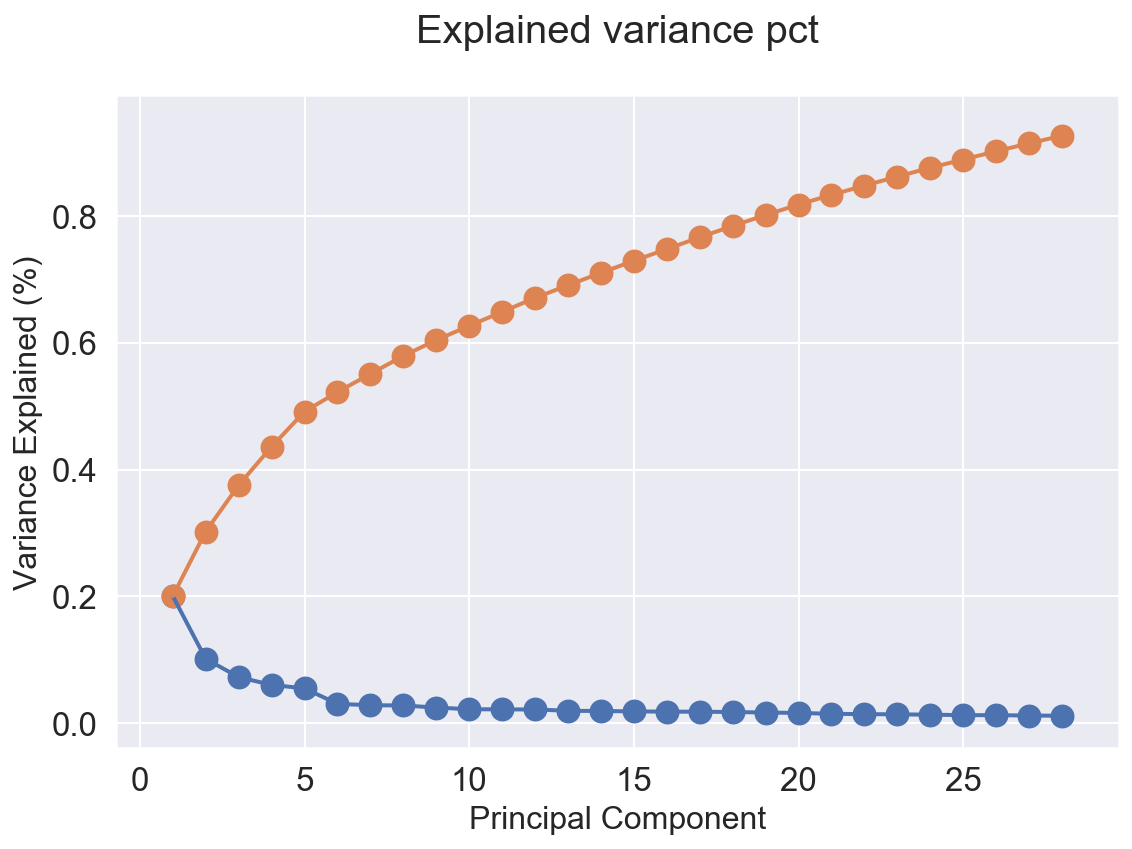

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
x_values = list(range(1, pca.n_components_+1))
ax.plot(x_values, explained_variance, lw=2)
ax.scatter(x_values, explained_variance, s=120)
ax.plot(x_values, np.cumsum(explained_variance), lw=2)
ax.scatter(x_values, np.cumsum(explained_variance), s=120)
#ax.plot(x_values,0.9)
ax.set_title('Explained variance pct\n', fontsize=20)
ax.set_xlabel('Principal Component', fontsize=16)
ax.set_ylabel('Variance Explained (%)', fontsize=16)
plt.show()

#### We select 32 PCA's which return 95% of variance  (28 PCA return 90% variance)

In [96]:
'''
Xpca_corr = X_pca.corr() #correlations.loc[[col for col in X_combined.columns if 'PCA' in col], disciplines]

fig, ax = plt.subplots(figsize=(60,36))
matrix = np.triu(Xpca_corr)
ax = sns.heatmap(Xpca_corr, annot = True, mask=matrix, center= 0, cmap="BuPu" ,fmt='.1g'); #cmap= 'coolwarm',  
'''

'\nXpca_corr = X_pca.corr() #correlations.loc[[col for col in X_combined.columns if \'PCA\' in col], disciplines]\n\nfig, ax = plt.subplots(figsize=(60,36))\nmatrix = np.triu(Xpca_corr)\nax = sns.heatmap(Xpca_corr, annot = True, mask=matrix, center= 0, cmap="BuPu" ,fmt=\'.1g\'); #cmap= \'coolwarm\',  \n'

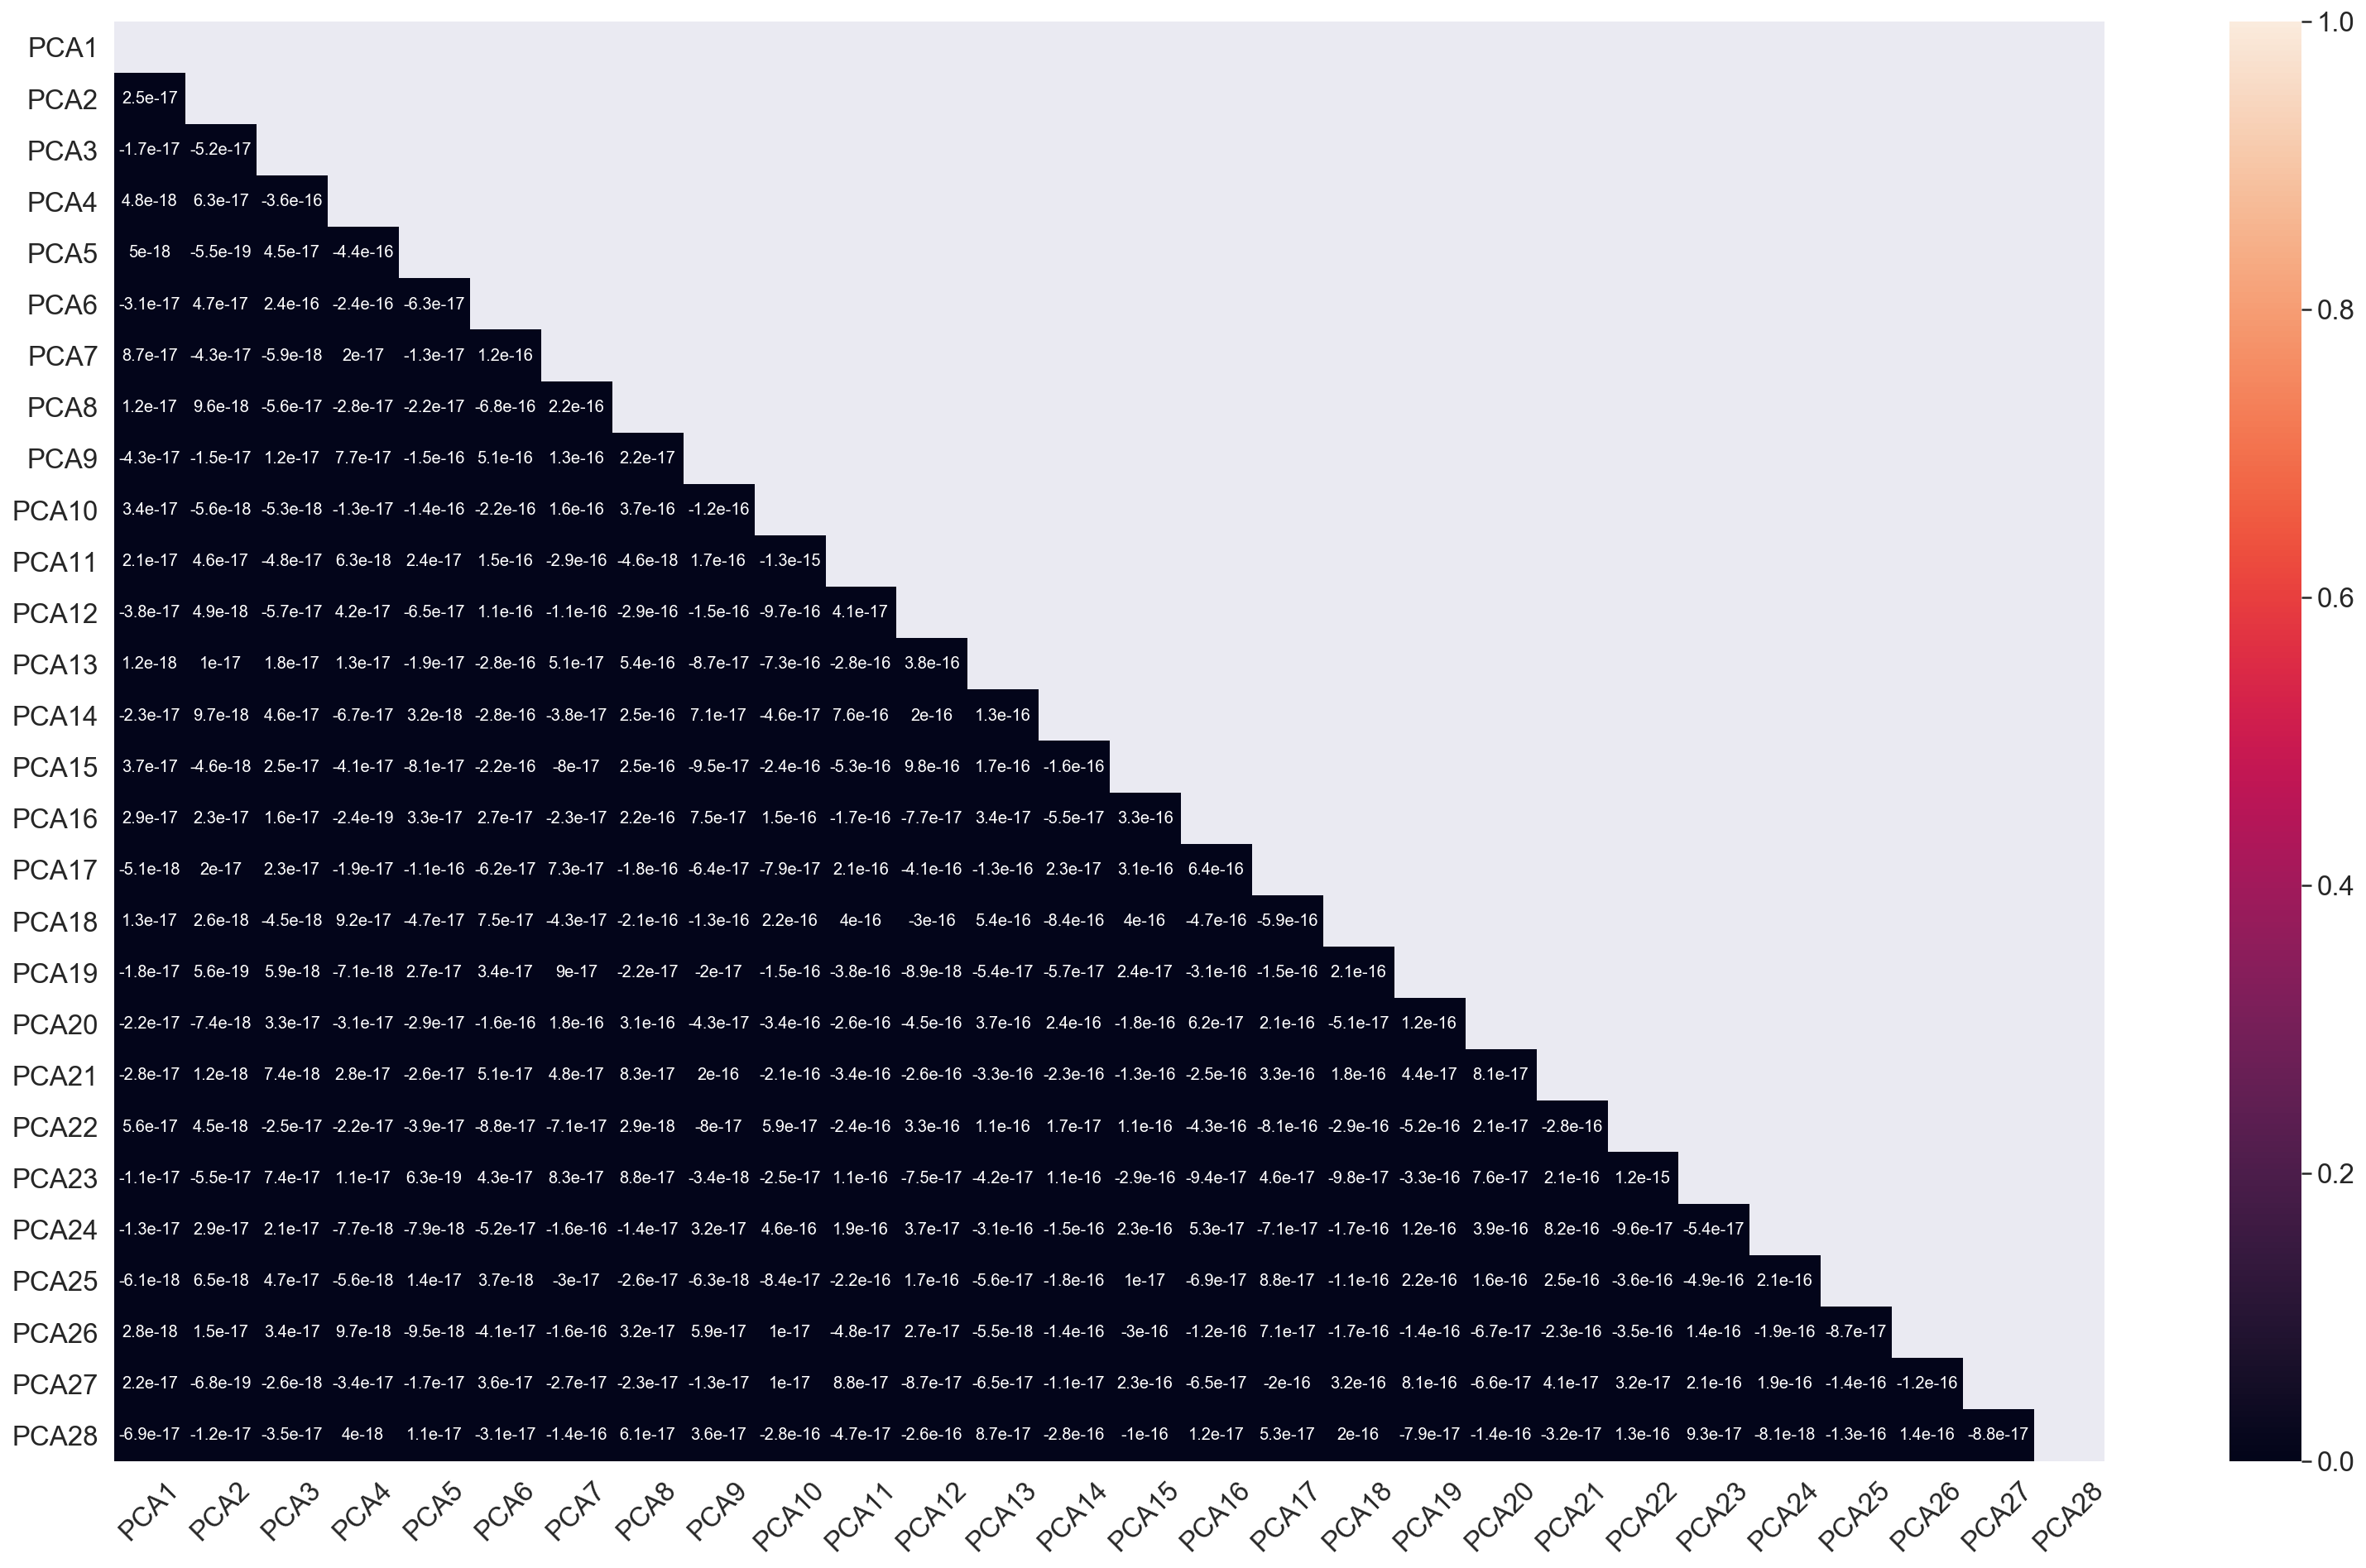

In [23]:
X_train_pca_corr = X_train_pca.corr()

mask = np.zeros_like(X_train_pca_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(24, 16))
ax = sns.heatmap(X_train_pca_corr, mask=mask, annot=True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), rotation=45)
ax.set_ylim(X_train_pca_corr.shape[1], 0)
plt.show()

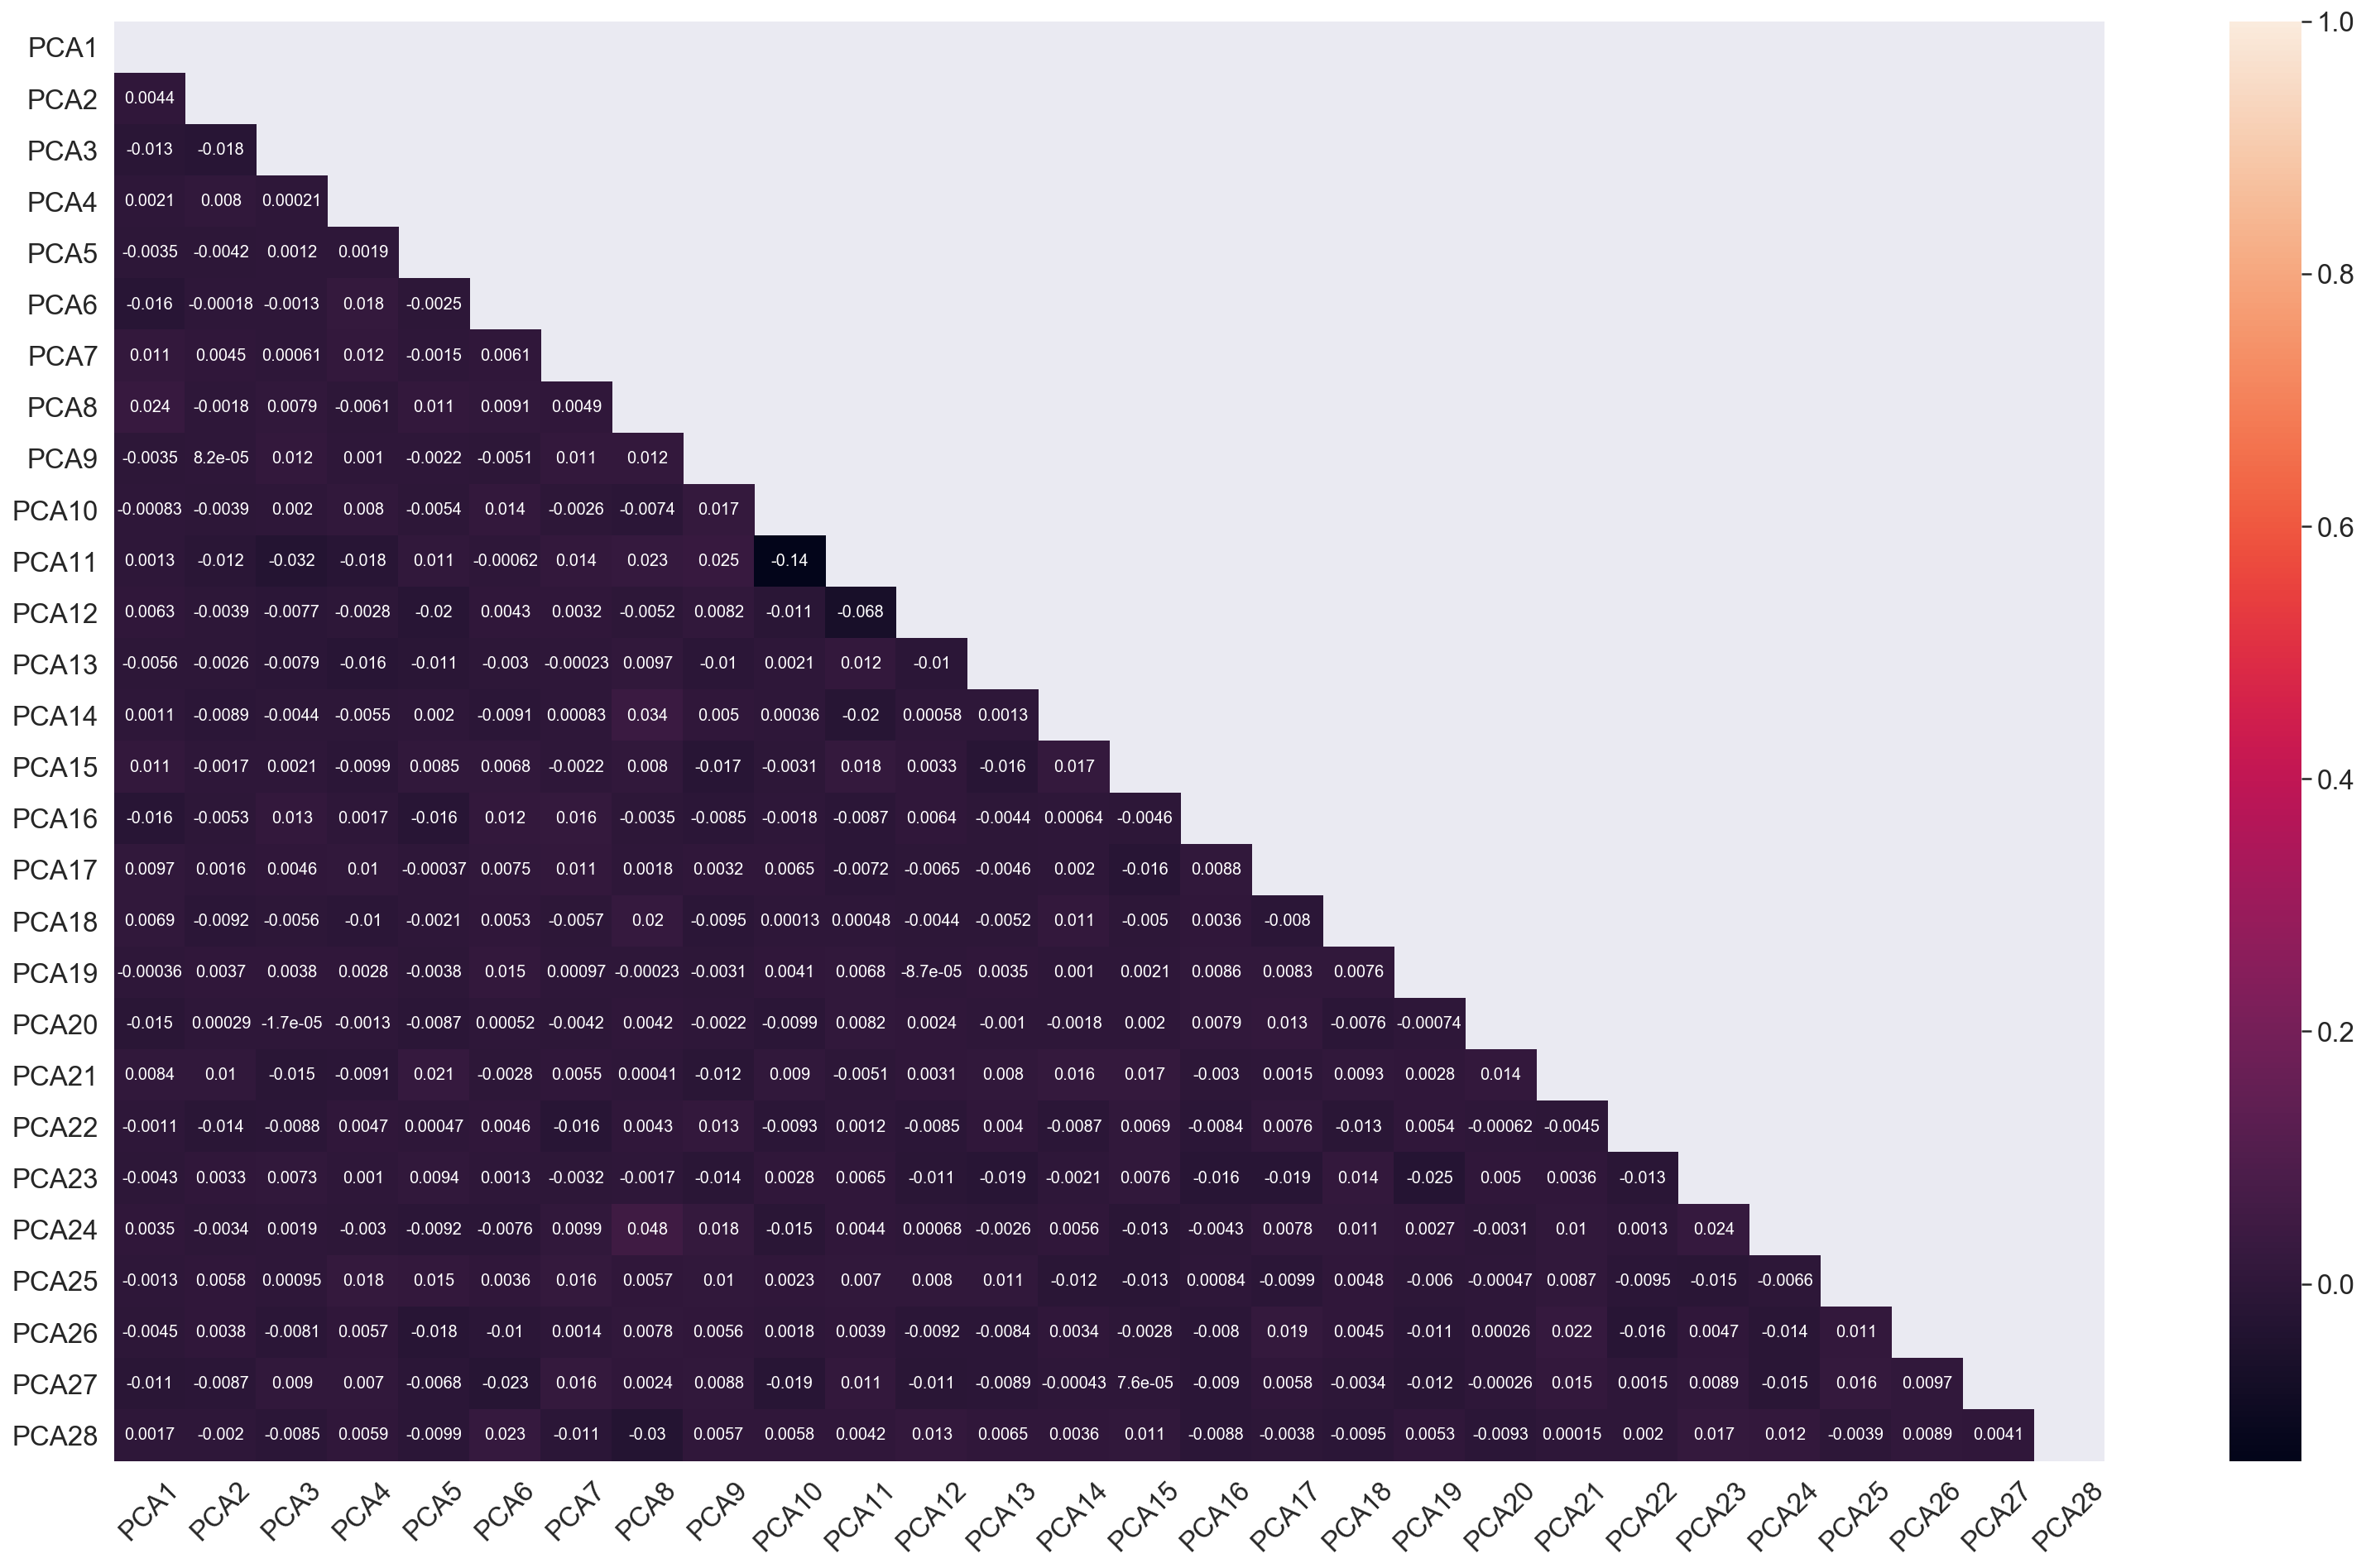

In [24]:
X_test_pca_corr = X_test_pca.corr()

mask = np.zeros_like(X_test_pca_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(24, 16))
ax = sns.heatmap(X_test_pca_corr, mask=mask, annot=True)
ax.set_xticklabels(ax.xaxis.get_ticklabels(), rotation=45)
ax.set_ylim(X_test_pca_corr.shape[1], 0)
plt.show()

### Building basic Logistic Regression model for readmission prediction

In [18]:
modelLR = LogisticRegression()

modelLR.fit(X_train_pca,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
print("Score(Train): ", modelLR.score(X_train_pca, y_train))
print("Cross Val Score (Train): ", cross_val_score(modelLR, X_train_pca, y_train, cv =5).mean()) 
print("Score (Test): ", modelLR.score(X_test_pca, y_test))

Score(Train):  0.7417839863416443
Cross Val Score (Train):  0.7417921677125646
Score (Test):  0.744190866842668


In [20]:
importance = modelLR.coef_[0]

importanceDF = pd.DataFrame(importance, index=X_train_pca.columns, 
                          columns=["Importance"])
importanceDF.sort_values(by='Importance', ascending=False).head(15)

Importance
PCA11    0.020579
PCA14    0.013042
PCA4     0.012176
PCA18    0.010234
PCA10    0.009061
PCA23    0.007552
PCA16    0.006159
PCA6     0.005988
PCA13    0.005519
PCA24    0.004843
PCA21    0.003528
PCA8     0.003011
PCA28    0.002782
PCA27    0.001343
PCA12    0.001275

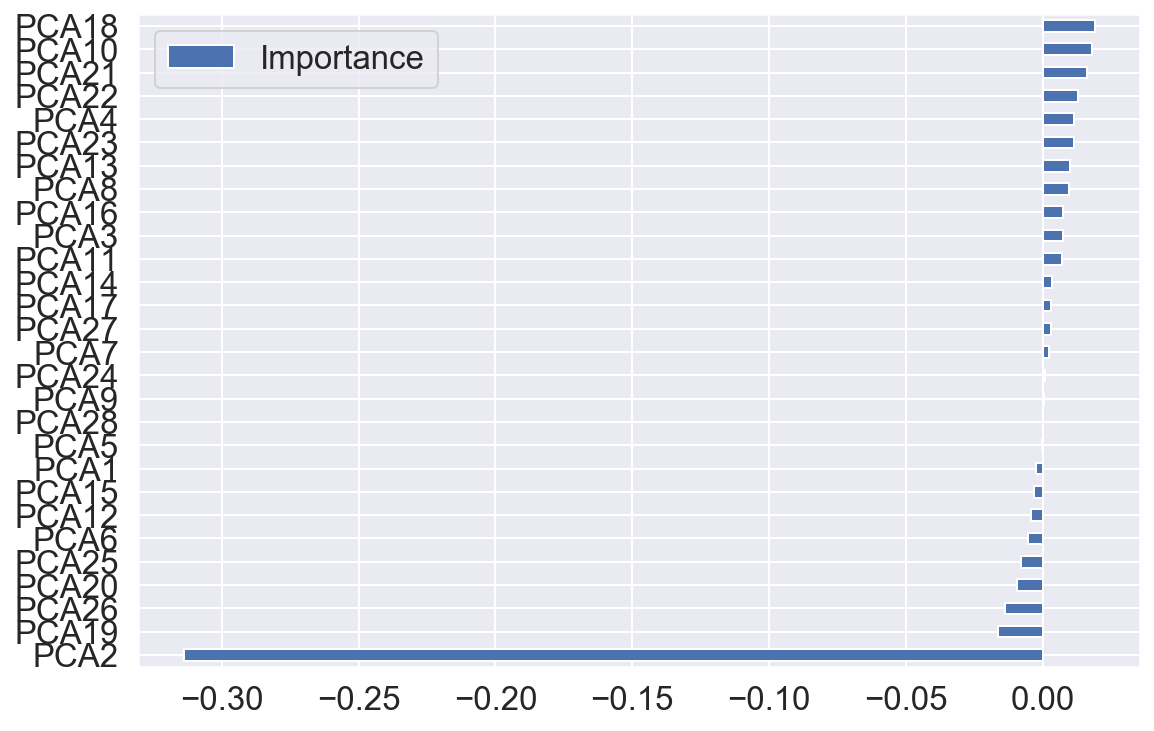

In [28]:
importanceDF.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(8, 6))
plt.show()

In [21]:
#print(pca.inverse_transform(X_train_pca)) 

[[ 0.89320386 -0.37572932 -0.28294347 ...  1.63000802  1.64078334
   1.65810896]
 [ 0.89392696  0.94458398 -0.2838599  ...  0.44663154  0.44942978
   0.45210156]
 [-1.11891083 -0.38092807 -0.01025553 ... -0.81007142 -0.81002567
  -0.80214171]
 ...
 [-1.11780107 -0.37740109 -0.28321045 ...  1.33716604  1.32524751
   1.33033318]
 [ 0.89487569 -0.37774418 -0.28422578 ... -0.62637775 -0.64681351
  -0.66364804]
 [-1.11590327 -0.37123508 -0.2391738  ... -0.81744965 -0.80080017
  -0.80535978]]


In [32]:
# Predictons and Probabilities

predictions_LRBase = modelLR.predict(X_test_pca)
predictions_LRBase

array([1, 1, 1, ..., 1, 1, 1])

In [33]:
probabilities_LRBase = modelLR.predict_proba(X_test_pca)
probabilities_LRBase

array([[0.30803844, 0.69196156],
       [0.42401859, 0.57598141],
       [0.17282567, 0.82717433],
       ...,
       [0.14153433, 0.85846567],
       [0.21073286, 0.78926714],
       [0.42977674, 0.57022326]])

In [34]:
labels=[0, 1]
confusion_mat = confusion_matrix(y_test, predictions_LRBase, labels=labels) # it is imp to put labels else its confusing
#print(labels)
#print(confusion_mat)

pd.DataFrame(confusion_mat,
             columns=['Predicted_No_Readmissions', 'Predicted_Readmissions'],
             index=['True_No_Readmissions', 'True_Readmissions'])

Predicted_No_Readmissions  Predicted_Readmissions
True_No_Readmissions                        202                    4965
True_Readmissions                          1039                   16702

In [35]:
print(classification_report(y_test, predictions_LRBase))

              precision    recall  f1-score   support

           0       0.16      0.04      0.06      5167
           1       0.77      0.94      0.85     17741

    accuracy                           0.74     22908
   macro avg       0.47      0.49      0.46     22908
weighted avg       0.63      0.74      0.67     22908



In [36]:
def plot_f1_lines(figsize=(8,6),fontsize=16):
    '''Create f1-score level lines to be added to the precison-recall plot'''

    fig, ax = plt.subplots(figsize=figsize)
    
    # add lines of constant F1 scores
    
    for const in np.linspace(0.2,0.9,8):
        x_vals = np.linspace(0.001, 0.999, 100)
        y_vals = 1./(2./const-1./x_vals)
        ax.plot(x_vals[y_vals > 0], y_vals[y_vals > 0],
                 color='lightblue', ls='--', alpha=0.9)
        ax.set_ylim([0, 1])
        ax.annotate('f1={0:0.1f}'.format(const),
                     xy=(x_vals[-10], y_vals[-2]+0.0), fontsize=fontsize)

    return fig, ax

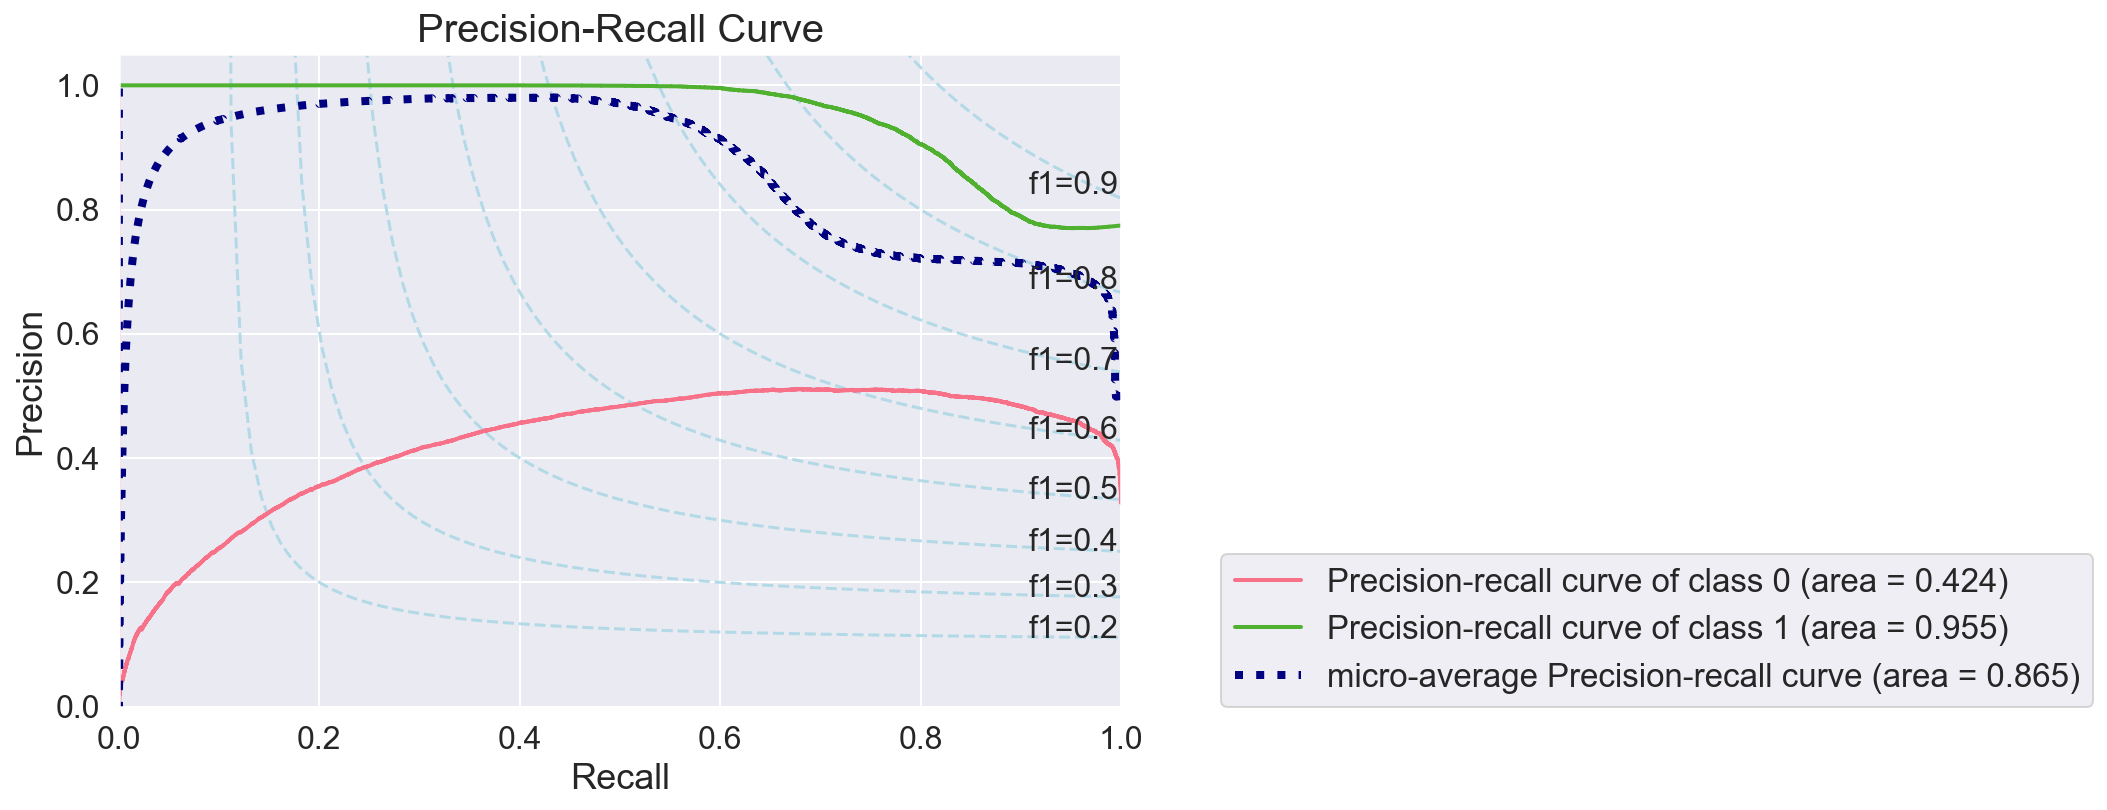

In [37]:
# plot_f1_lines # already defined

# Recall Precision plot

fig, ax = plot_f1_lines()
skplt.metrics.plot_precision_recall(y_test, probabilities_LRBase, 
                       plot_micro=True, 
                       title_fontsize=20, text_fontsize=16, cmap=cmap, ax=ax)
ax.legend(loc=[1.1,0])
plt.show()

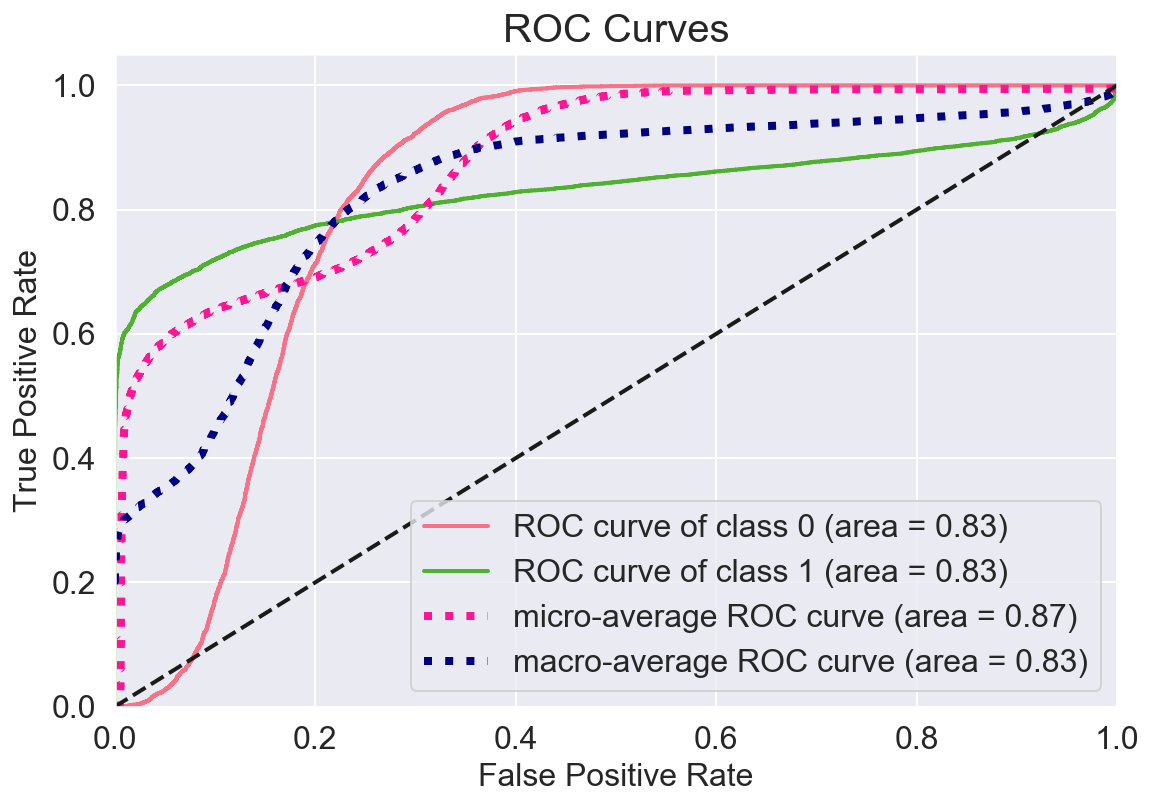

In [38]:
# ROC plot

skplt.metrics.plot_roc(y_test, probabilities_LRBase, plot_micro=True, plot_macro=True, 
                       title_fontsize=20, text_fontsize=16, figsize=(8,6), cmap=cmap)
plt.show()

### Random Forest

In [42]:
modelRF = RandomForestClassifier(n_estimators=100, criterion='gini')
modelRF.fit(X_train_pca,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [43]:
print("Score(Train): ", modelRF.score(X_train_pca, y_train))
print("Cross Val Score (Train): ", cross_val_score(modelRF, X_train_pca, y_train, cv =5).mean()) 
print("Score (Test): ", modelRF.score(X_test_pca, y_test))

Score(Train):  1.0
Cross Val Score (Train):  0.9432718529372724
Score (Test):  0.9421599441243234


In [ ]:
# Write function for diff models and grid search pipeline
try with and without over sampling
LR,
KNN,
DT,
RF
SVM
AdaBoost?
change threshold of probability and see if the accuracy gets better
is recall or precision more imp for me 

death prediction
cost prediction
disease prediction

In [ ]:
#week 5 day 1

pipe = Pipeline(steps=[('scaler', scaler),
                       ('model', model)])

pipe.fit(X, y)

columns_to_drop = ['PassengerId', 'Name']
columns_to_dummify = ['Sex', 'Pclass', 'Embarked']

tprep = TitanticPreprocessor(columns_to_drop=columns_to_drop,
                             columns_to_dummify=columns_to_dummify)
scaler = StandardScaler()
model = LogisticRegression(solver='lbfgs', random_state=1)

pipe = Pipeline(steps=[('titanic_prep', tprep),
                       ('scaler', scaler),
                       ('model', model)
                      ]
               )


scaler = StandardScaler()
#scaler = MinMaxScaler()
poly = PolynomialFeatures(include_bias=False)
model = LogisticRegression(solver='lbfgs')
#model = KNeighborsClassifier()
fu_pipe = Pipeline(steps=(('union', fu),
                          ('poly', poly),
                          ('scaler', scaler),
                          ('model', model)))

In [ ]:
# setup the grid search

params = {'C': np.logspace(-4, 4, 10),
          'penalty': ['l1', 'l2'],
          'fit_intercept': [True, False]}

gs = GridSearchCV(estimator=model,
                  param_grid=params,
                  cv=5,
                  scoring='accuracy',
                  return_train_score=True)

gs.fit(X_train, y_train)

# extract the grid search results

print('Best Parameters:')
print(gs.best_params_)
print('Best estimator C:')
print(gs.best_estimator_.C)
print('Best estimator mean cross validated training score:')
print(gs.best_score_)
print('Best estimator score on the full training set:')
print(gs.score(X_train, y_train))
print('Best estimator score on the test set:')
print(gs.score(X_test, y_test))
print('Best estimator coefficients:')
print(gs.best_estimator_.coef_)

In [ ]:
# Can I find imp features (rev engg PCAs to real feature) - https://towardsdatascience.com/feature-extraction-using-principal-component-analysis-a-simplified-visual-demo-e5592ced100a

In [ ]:
# Can i do deeper analytics to find which diseases are mostly like for readmssion or mots/leat expenseive so that we 

# can target the low hanging fruits

In [ ]:
# Can i look at probablities and figure out the index and relate to the patient

In [ ]:
final2008_2009DF_selectedFeatures['READMIT7'].unique()

In [ ]:
final2008_2009DF_selectedFeatures['READMIT30'].unique()

In [ ]:
final2008_2009DF_selectedFeatures['READMIT60'].unique()

In [ ]:
final2008_2009DF_selectedFeatures['READMIT90'].unique()

In [ ]:
# do oversample for eda

# Class count
count_class_0, count_class_1 = final2008_2009DF_selectedFeatures['DEAD'].value_counts() #READMIT7_FLAG
count_class_0, count_class_1

In [ ]:
# Divide by class
df_class_0 = final2008_2009DF_selectedFeatures[final2008_2009DF_selectedFeatures['DEAD'] == 0]   
df_class_1 = final2008_2009DF_selectedFeatures[final2008_2009DF_selectedFeatures['DEAD'] == 1]
print(df_class_0.shape)
print(df_class_1.shape)

In [ ]:
# Oversampling class 1

df_class_1_over = df_class_1.sample(count_class_0, replace=True)
final2008_2009DF_over = pd.concat([df_class_0, df_class_1_over], axis=0)
print(final2008_2009DF_over.shape)
final2008_2009DF_over.head()